# <font color='#6495ED'>A Plan Beyond Retirement</font>

<font color='#6495ED'>_____________________________________________________________________</font>

***<font color='#6495ED'>Teammates:</font>***
- Munukutla Durga Venkata Kashyap
- Sai Mahesh Vemulapalli
- Aneesh Potnis
- Aditya Pimpley
- Neksha Patel

GITHUB LINK: https://github.com/kashyap-1234/Retirement

**<font color='#6495ED'>Introduction:</font>**

Predicting an individual's life expectancy has long been a focal point for researchers, delving into the intricate interplay between medical and socioeconomic factors that shape the trajectory of one's life. This pursuit is underscored by the fundamental question: "What is the life expectancy of a person, given their medical and socioeconomic history?" The potential advantages of unraveling this mystery extend far beyond the realm of academia, promising significant strides in practical domains such as personal finance and retirement planning. Imagine a future where individuals can meticulously tailor their financial strategies based on a nuanced understanding of their likely lifespan. This could result in a paradigm shift in retirement planning, with people making informed decisions about when to retire, how to allocate their savings, and how to optimize their healthcare investments. Furthermore, this knowledge could empower healthcare professionals to engage in proactive and personalized healthcare planning, especially for those deemed at-risk due to medical or socioeconomic factors. In essence, a plan beyond retirement emerges, where the fusion of predictive analytics and personalized strategies revolutionizes not only the individual's approach to their future but also the broader landscape of financial and healthcare sectors.

**<font color='#6495ED'>Changes made since the proposal:</font>**

Upon careful review and consideration, it is noteworthy that there have been no alterations to the initial proposal outlined in the check-in presentation. The project's scope, objectives, and key components have remained consistent, underscoring the stability and continuity of the planned approach.

**<font color='#6495ED'>Data:<font>**


The dataset, sourced from the University of Michigan Health and Retirement Study (HRS), comprises longitudinal population health data focusing on transitions across ages 50 to 99, income groups, and gender. With 301 rows and 32 columns, the data encompasses quantitative (age), categorical/nominal (gender), and categorical/ordinal (income group) variables. The core of the dataset lies in the quantitative and discrete representation of health transitions, detailing shifts between Good Health, Bad Health, Nursing Home (NH), and Home Health Care (HHC) states. This dataset offers a comprehensive perspective on the complex interplay of age, gender, income, and health transitions within the studied population.

<br>

## **<font color='#6495ED'>Exploratory Data Analysis (EDA)</font>**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("count_by_all_dimensions_for_high_level_model_v2.csv")
data.head(5)

,Unnamed: 0,Age,Inc_group,Gender,Dead to Dead,Dead to Good Health,Dead to Poor Health,Dead to NH,Dead to HHC,Good Health to Dead,...,NH to HHC,HHC to Dead,HHC to Good Health,HHC to Poor Health,HHC to NH,HHC to HHC,Good Health at t,Bad Health at t,NH at t,HHC at t
0,0,50,1,1.male,4,0,0,0,0,2,...,0,2,2,2,0,5,149,95,1,11
1,1,51,1,1.male,7,0,0,0,0,2,...,0,1,5,10,1,7,309,193,1,24
2,2,52,1,1.male,7,0,0,0,0,9,...,0,4,9,7,0,19,418,273,0,39
3,3,53,1,1.male,8,0,0,0,0,9,...,0,10,8,14,2,15,572,351,2,49
4,4,54,1,1.male,14,0,0,0,0,3,...,0,6,18,21,0,18,641,418,1,63


In [ ]:
healthy_cols = []
nursing_cols = []
poor_health_cols = []
hhc_cols = []

for col in data.columns:
    if "Good Health to" in col:
        healthy_cols.append(col)
        continue
    if "NH to" in col:
        nursing_cols.append(col)
        continue
    if "Poor Health to" in col:
        poor_health_cols.append(col)
        continue
    if "HHC to" in col:
        hhc_cols.append(col)
        continue

In [ ]:
healthy_count = 0
nursing_count = 0
poor_health_count = 0
hhc_count = 0
dead_count = 0

for col in data.columns:
    if col in healthy_cols:
        healthy_count += data[col].sum()
        continue
    if col in nursing_cols:
        nursing_count += data[col].sum()
        continue
    if col in poor_health_cols:
        poor_health_count += data[col].sum()
        continue
    if col in hhc_cols:
        hhc_count += data[col].sum()
        continue
    if "Dead to" in col:
        dead_count += data[col].sum()

[Text(0.5, 1.0, 'Health state distribution'),
 Text(0.5, 0, 'Health state'),
 Text(0, 0.5, 'Number of individuals')]

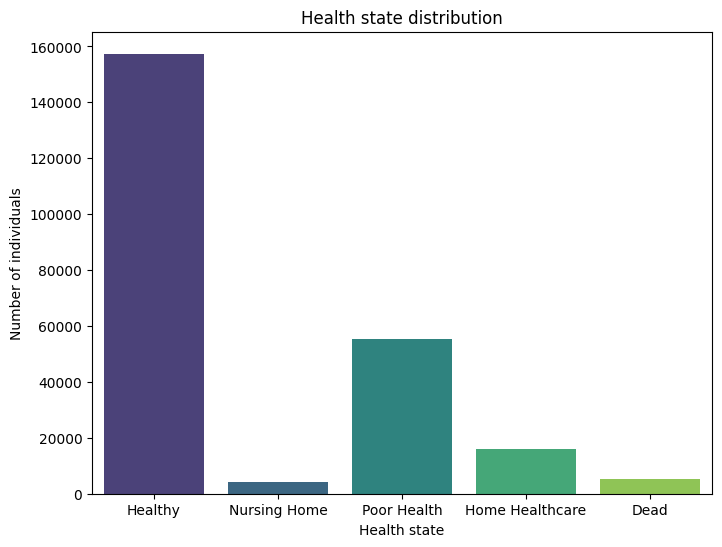

In [ ]:
labels = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes = [healthy_count,nursing_count,poor_health_count,hhc_count,dead_count]

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x = labels, y = sizes, hue=labels, legend=False,palette='viridis', ax=ax).set(title='Health state distribution',
                                                                                         xlabel='Health state',ylabel='Number of individuals')

The visualization above represents the division of the health states based on the total number of individuals. The observation is that the number of people in the "Healthy" state dominates the dataset, with the lowest being entries in the nursing home.

In [ ]:
male_data = data[data['Gender']=='1.male']
female_data = data[data['Gender']=='2.female']

male_count = 0
female_count = 0

for col in male_data.columns:
    if col in healthy_cols:
        male_count+=male_data[col].sum()
    if col in nursing_cols:
        male_count+=male_data[col].sum()
    if col in poor_health_cols:
        male_count+=male_data[col].sum()
    if col in hhc_cols:
        male_count+=male_data[col].sum()
    if "Dead to" in col:
        male_count+=male_data[col].sum()

for col in female_data.columns:
    if col in healthy_cols:
        female_count+=female_data[col].sum()
    if col in nursing_cols:
        female_count+=female_data[col].sum()
    if col in poor_health_cols:
        female_count+=female_data[col].sum()
    if col in hhc_cols:
        female_count+=female_data[col].sum()
    if "Dead to" in col:
        female_count+=female_data[col].sum()

print(male_count)
print(female_count)

101009
137349


[Text(0.5, 1.0, 'Gender distribution'),
 Text(0.5, 0, 'Gender'),
 Text(0, 0.5, 'Number of individuals')]

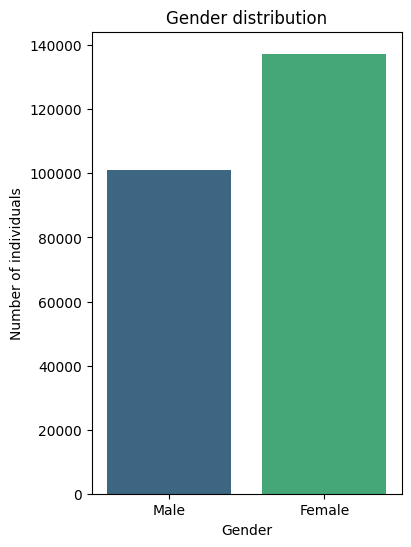

In [ ]:
labels = ['Male','Female']
sizes = [male_count, female_count]

fig, ax = plt.subplots(figsize=(4, 6))

sns.barplot(x = labels, y = sizes, hue=labels, legend=False,palette='viridis', ax=ax).set(title='Gender distribution',
                                                                                         xlabel='Gender',ylabel='Number of individuals')

The visualization above represents the gender distribution between male and female based on the Number of individuals. The number of entries for female gender is higher than the ones for male gender.

In [ ]:
age_groups = ['50-59','60-69','70-79','80-89','90-99']
age_groups_counts = [0,0,0,0,0]

data_groups = []
data_groups.append(data[(data['Age']>49) & (data['Age']<60)])
data_groups.append(data[(data['Age']>59) & (data['Age']<70)])
data_groups.append(data[(data['Age']>69) & (data['Age']<80)])
data_groups.append(data[(data['Age']>79) & (data['Age']<90)])
data_groups.append(data[(data['Age']>89) & (data['Age']<100)])

In [ ]:
for i in range(5):
    for col in data_groups[i].columns:
        if col in healthy_cols:
            age_groups_counts[i]+=data_groups[i][col].sum()
        if col in nursing_cols:
            age_groups_counts[i]+=data_groups[i][col].sum()
        if col in poor_health_cols:
            age_groups_counts[i]+=data_groups[i][col].sum()
        if col in hhc_cols:
            age_groups_counts[i]+=data_groups[i][col].sum()
        if "Dead to" in col:
            age_groups_counts[i]+=data_groups[i][col].sum()

[Text(0.5, 1.0, 'Age distribution'),
 Text(0.5, 0, 'Age ranges'),
 Text(0, 0.5, 'Number of individuals')]

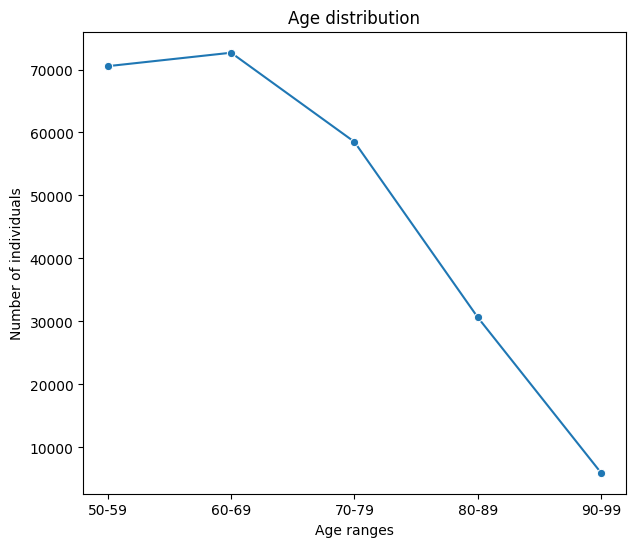

In [ ]:
labels = age_groups
sizes = age_groups_counts

fig, ax = plt.subplots(figsize=(7, 6))
sns.lineplot(x = labels, y = sizes,style=1,legend=False, markers=True).set(title='Age distribution',
                                                                                         xlabel='Age ranges',ylabel='Number of individuals')

The above visualization describes the Age Distribution versus the Number of Individuals. Starting off at age range 50-59, the amount of data points is the highest in the age range 60-69, and gradually falls off when moving towards the higher ranges.

**Interesting Issues or Premilinary conclusions:**<br>
The data has quite a few imbalances in the data set, with regards to health states, gender and age ranges. Due to this imbalances, the results of a predictive model in the future may be more biased towards the data group with the higher number of data points rather than generalizing for the entire range.<br><br>
We can also form a conclusion that based on initial observations, the state change probability will be heavily in favor of a person remaining in the Healthy state if they start off in that state.

In [ ]:
age_groups_counts_male = [0,0,0,0,0]

data_groups_male = []
data_groups_male.append(male_data[(male_data['Age']>49) & (male_data['Age']<60)])
data_groups_male.append(male_data[(male_data['Age']>59) & (male_data['Age']<70)])
data_groups_male.append(male_data[(male_data['Age']>69) & (male_data['Age']<80)])
data_groups_male.append(male_data[(male_data['Age']>79) & (male_data['Age']<90)])
data_groups_male.append(male_data[(male_data['Age']>89) & (male_data['Age']<100)])

for i in range(5):
    for col in data_groups_male[i].columns:
        if col in healthy_cols:
            age_groups_counts_male[i]+=data_groups_male[i][col].sum()
        if col in nursing_cols:
            age_groups_counts_male[i]+=data_groups_male[i][col].sum()
        if col in poor_health_cols:
            age_groups_counts_male[i]+=data_groups_male[i][col].sum()
        if col in hhc_cols:
            age_groups_counts_male[i]+=data_groups_male[i][col].sum()
        if "Dead to" in col:
            age_groups_counts_male[i]+=data_groups_male[i][col].sum()

In [ ]:
age_groups_counts_female = [0,0,0,0,0]

data_groups_female = []
data_groups_female.append(female_data[(female_data['Age']>49) & (female_data['Age']<60)])
data_groups_female.append(female_data[(female_data['Age']>59) & (female_data['Age']<70)])
data_groups_female.append(female_data[(female_data['Age']>69) & (female_data['Age']<80)])
data_groups_female.append(female_data[(female_data['Age']>79) & (female_data['Age']<90)])
data_groups_female.append(female_data[(female_data['Age']>89) & (female_data['Age']<100)])

for i in range(5):
    for col in data_groups_female[i].columns:
        if col in healthy_cols:
            age_groups_counts_female[i]+=data_groups_female[i][col].sum()
        if col in nursing_cols:
            age_groups_counts_female[i]+=data_groups_female[i][col].sum()
        if col in poor_health_cols:
            age_groups_counts_female[i]+=data_groups_female[i][col].sum()
        if col in hhc_cols:
            age_groups_counts_female[i]+=data_groups_female[i][col].sum()
        if "Dead to" in col:
            age_groups_counts_female[i]+=data_groups_female[i][col].sum()

##<font color='#6495ED'>Visualizations</font>
1. Distribution of data based on gender - <font color='#6495ED'>Neksha Vinodbhai Patel</font>

  x-axis --> Age Groups from 50 to 99

  y-axis --> Number of individuals

  The hypothesis argues that there would be a similarity in the distribution of ages between both genders, as well as a similarity in the distribution of health conditions among both genders.

[Text(0.5, 1.0, 'Age distribution by gender'),
 Text(0.5, 0, 'Age groups'),
 Text(0, 0.5, 'Number of individuals')]

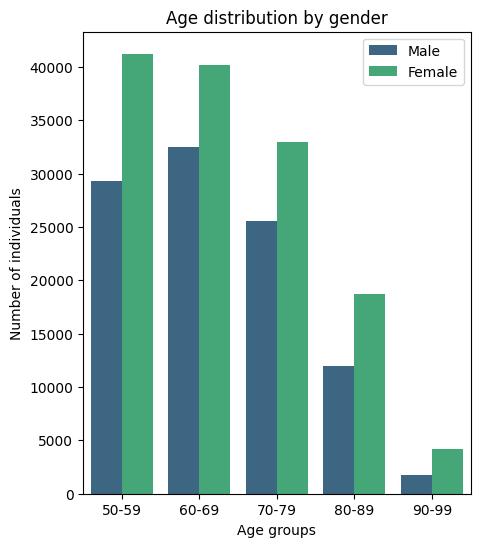

In [ ]:
labels = age_groups+age_groups
sizes = age_groups_counts_male+age_groups_counts_female
hue = ['Male','Male','Male','Male','Male','Female','Female','Female','Female','Female']

fig, ax = plt.subplots(figsize=(5, 6))

sns.barplot(x = labels, y = sizes, hue=hue,palette='viridis', ax=ax).set(title='Age distribution by gender',
                                                                                         xlabel='Age groups',ylabel='Number of individuals')

In every age group, the number of females in the dataset is higher than the number of males.

Insight: The data across all the age ranges has a higher number of females than males. This may result in a model that would be more inclined to optimize for the life expectancies of females over the combination of males and females in order to achieve better accuracy over this training data.

2. Health State Distribution by Gender - <font color='#6495ED'>Neksha Vinodbhai Patel</font>

  x-axis --> Health State

  y-axis --> Number of Individuals

<br>

In [ ]:
healthy_count_male = 0
nursing_count_male = 0
poor_health_count_male = 0
hhc_count_male = 0
dead_count_male = 0

healthy_count_female = 0
nursing_count_female = 0
poor_health_count_female = 0
hhc_count_female = 0
dead_count_female = 0



for col in data.columns:
    if col in healthy_cols:
        healthy_count_male += male_data[col].sum()
        healthy_count_female += female_data[col].sum()
        continue
    if col in nursing_cols:
        nursing_count_male += male_data[col].sum()
        nursing_count_female += female_data[col].sum()
        continue
    if col in poor_health_cols:
        poor_health_count_male += male_data[col].sum()
        poor_health_count_female += female_data[col].sum()
        continue
    if col in hhc_cols:
        hhc_count_male += male_data[col].sum()
        hhc_count_female += female_data[col].sum()
        continue
    if "Dead to" in col:
        dead_count_male += male_data[col].sum()
        dead_count_female += female_data[col].sum()

[Text(0.5, 1.0, 'Health state distribution by Gender'),
 Text(0.5, 0, 'Health state'),
 Text(0, 0.5, 'Number of individuals')]

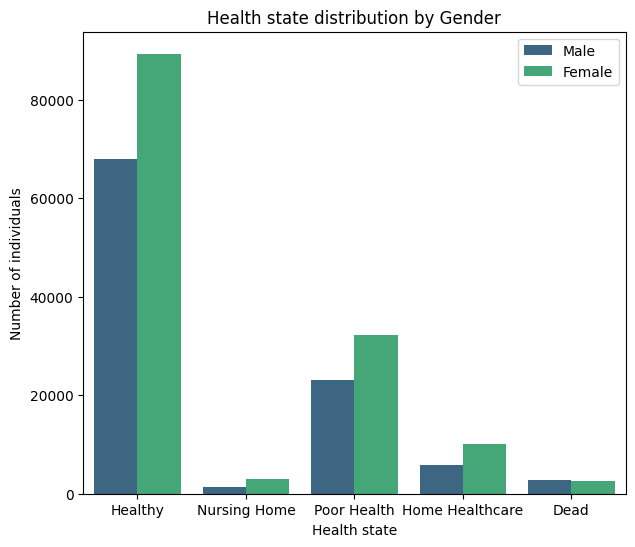

In [ ]:
labels = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead','Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
male_counts_health = [healthy_count_male,nursing_count_male,poor_health_count_male,hhc_count_male,dead_count_male]
female_counts_health = [healthy_count_female,nursing_count_female,poor_health_count_female,hhc_count_female,dead_count_female]
sizes = male_counts_health+female_counts_health
hue = ['Male','Male','Male','Male','Male','Female','Female','Female','Female','Female']

fig, ax = plt.subplots(figsize=(7, 6))
sns.barplot(x = labels, y = sizes, hue=hue,palette='viridis', ax=ax).set(title='Health state distribution by Gender',
                                                                                         xlabel='Health state',ylabel='Number of individuals')

The visualization represents the gender distribution combined with the health states taken from the total number of individuals

**Insight:**<br>
The intial hypothesis was that the distribution of genders among the various age groups and health states would be similar. However, based on the visualizations above, the data has a clear imbalance in these categories, with the exception of the data points in the "dead" state. This means that our hypothesis has been disproven with regards to this data. Additionally, this imbalance in the data could result in the resulting machine learning models to be biased towards a certain data group compared to others.



3.   Quality of life among different income groups. - **<font color='#6495ED'>Aneesh Potnis, Aditya Pimpley<font>**

      x-axis --> 5 Health States (Good Health, Poor Health, NH, HHC, Death)\
      y-axis --> Percent of People (%)\
      hue --> Income group

      The first visualization considers the trends in the 5 health states for the 3 income groups over the duration
      of the study.

      The hypothesis is that the higher the income group the longer people tend to be in the good health state.
      Similarly, the percentage of people dying for every income group tends to decrease as we go up income groups.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd "/content/drive/MyDrive/DS_Project"
!pwd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('count_by_all_dimensions_for_high_level_model_v2.csv')
df

,Unnamed: 0,Age,Inc_group,Gender,Dead to Dead,Dead to Good Health,Dead to Poor Health,Dead to NH,Dead to HHC,Good Health to Dead,...,NH to HHC,HHC to Dead,HHC to Good Health,HHC to Poor Health,HHC to NH,HHC to HHC,Good Health at t,Bad Health at t,NH at t,HHC at t
0,0,50,1,1.male,4,0,0,0,0,2,...,0,2,2,2,0,5,149,95,1,11
1,1,51,1,1.male,7,0,0,0,0,2,...,0,1,5,10,1,7,309,193,1,24
2,2,52,1,1.male,7,0,0,0,0,9,...,0,4,9,7,0,19,418,273,0,39
3,3,53,1,1.male,8,0,0,0,0,9,...,0,10,8,14,2,15,572,351,2,49
4,4,54,1,1.male,14,0,0,0,0,3,...,0,6,18,21,0,18,641,418,1,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,45,95,3,2.female,7,0,0,0,0,4,...,0,7,4,0,10,4,27,8,20,25
296,46,96,3,2.female,4,0,0,0,0,4,...,1,6,2,0,1,6,20,7,16,15
297,47,97,3,2.female,5,0,0,0,0,7,...,1,3,2,0,0,3,13,2,16,8
298,48,98,3,2.female,3,0,0,0,0,2,...,0,6,0,2,4,2,8,2,4,14


In [ ]:
df['Gender'] = df['Gender'].apply(lambda x: x[2:])
df

,Unnamed: 0,Age,Inc_group,Gender,Dead to Dead,Dead to Good Health,Dead to Poor Health,Dead to NH,Dead to HHC,Good Health to Dead,...,NH to HHC,HHC to Dead,HHC to Good Health,HHC to Poor Health,HHC to NH,HHC to HHC,Good Health at t,Bad Health at t,NH at t,HHC at t
0,0,50,1,male,4,0,0,0,0,2,...,0,2,2,2,0,5,149,95,1,11
1,1,51,1,male,7,0,0,0,0,2,...,0,1,5,10,1,7,309,193,1,24
2,2,52,1,male,7,0,0,0,0,9,...,0,4,9,7,0,19,418,273,0,39
3,3,53,1,male,8,0,0,0,0,9,...,0,10,8,14,2,15,572,351,2,49
4,4,54,1,male,14,0,0,0,0,3,...,0,6,18,21,0,18,641,418,1,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,45,95,3,female,7,0,0,0,0,4,...,0,7,4,0,10,4,27,8,20,25
296,46,96,3,female,4,0,0,0,0,4,...,1,6,2,0,1,6,20,7,16,15
297,47,97,3,female,5,0,0,0,0,7,...,1,3,2,0,0,3,13,2,16,8
298,48,98,3,female,3,0,0,0,0,2,...,0,6,0,2,4,2,8,2,4,14


In [ ]:
df.drop(df.iloc[:, 5:9], inplace=True, axis=1)
df = df.rename(columns={"Unnamed: 0":"SrNo"})
df = df.set_index('SrNo')
df

,Age,Inc_group,Gender,Dead to Dead,Good Health to Dead,Good Health to Good Health,Good Health to Poor Health,Good Health to NH,Good Health to HHC,Poor Health to Dead,...,NH to HHC,HHC to Dead,HHC to Good Health,HHC to Poor Health,HHC to NH,HHC to HHC,Good Health at t,Bad Health at t,NH at t,HHC at t
SrNo,,,,,,,,,,,,,,,,,,,,,
0,50,1,male,4,2,118,26,0,3,8,...,0,2,2,2,0,5,149,95,1,11
1,51,1,male,7,2,255,47,0,5,6,...,0,1,5,10,1,7,309,193,1,24
2,52,1,male,7,9,332,64,2,11,14,...,0,4,9,7,0,19,418,273,0,39
3,53,1,male,8,9,444,104,0,15,14,...,0,10,8,14,2,15,572,351,2,49
4,54,1,male,14,3,527,93,2,16,24,...,0,6,18,21,0,18,641,418,1,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,95,3,female,7,4,14,3,5,1,2,...,0,7,4,0,10,4,27,8,20,25
46,96,3,female,4,4,4,2,3,7,2,...,1,6,2,0,1,6,20,7,16,15
47,97,3,female,5,7,1,1,3,1,2,...,1,3,2,0,0,3,13,2,16,8


In [ ]:
df['Good Health to Good Health'] = df['Good Health to Good Health'] + df['Poor Health to Good Health'] + df['NH to Good Health'] + df['HHC to Good Health']

df['Poor Health to Poor Health'] = df['Good Health to Poor Health'] + df['Poor Health to Poor Health'] + df['NH to Poor Health'] + df['HHC to Poor Health']

df['NH to NH'] = df['Good Health to NH'] + df['Poor Health to NH'] + df['NH to NH'] + df['HHC to NH']

df['HHC to HHC'] = df['Good Health to HHC'] + df['Poor Health to HHC'] + df['NH to HHC'] + df['HHC to HHC']

df['Dead to Dead'] = df['Good Health to Dead'] + df['Poor Health to Dead'] + df['NH to Dead'] + df['HHC to Dead'] + df['Dead to Dead']

In [ ]:
df4 = pd.DataFrame()
df4 = df.copy()
df.drop(columns=['Age'], inplace=True, axis=1)

In [ ]:
df = df.groupby(by=['Inc_group']).sum()
df

<ipython-input-10-771b3fe9da0a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(by=['Inc_group']).sum()


,Dead to Dead,Good Health to Dead,Good Health to Good Health,Good Health to Poor Health,Good Health to NH,Good Health to HHC,Poor Health to Dead,Poor Health to Good Health,Poor Health to Poor Health,Poor Health to NH,...,NH to HHC,HHC to Dead,HHC to Good Health,HHC to Poor Health,HHC to NH,HHC to HHC,Good Health at t,Bad Health at t,NH at t,HHC at t
Inc_group,,,,,,,,,,,,,,,,,,,,,
1,9995,2021,54524,8563,578,2490,2880,7695,32176,779,...,58,1466,1676,2377,628,8658,58754,35859,2368,8908
2,6092,1737,54393,5779,495,2342,1334,4211,13962,412,...,40,773,1497,945,371,4797,59005,14467,1270,4694
3,2901,933,37193,2364,289,1432,548,1603,5031,171,...,27,361,941,356,180,2453,39638,5077,675,2367


In [ ]:
df2 = pd.DataFrame()
df2 = df[['Good Health to Good Health', 'Poor Health to Poor Health', 'NH to NH', 'HHC to HHC', 'Dead to Dead']]
df2

,Good Health to Good Health,Poor Health to Poor Health,NH to NH,HHC to HHC,Dead to Dead
Inc_group,,,,,
1,54524,32176,3289,8658,9995
2,54393,13962,1929,4797,6092
3,37193,5031,962,2453,2901


In [ ]:
df2['Total'] = df2.sum(axis=1)

In [ ]:
df2

,Good Health to Good Health,Poor Health to Poor Health,NH to NH,HHC to HHC,Dead to Dead,Total
Inc_group,,,,,,
1,54524,32176,3289,8658,9995,108642
2,54393,13962,1929,4797,6092,81173
3,37193,5031,962,2453,2901,48540


In [ ]:
df2 = df2.apply(lambda x: (x/df2['Total'])*100)
df2

df2.rename(columns={'Dead to Dead':	'Dead','Good Health to Good Health':'Good Health',	'Poor Health to Poor Health':'Poor Health','NH to NH':'NH','HHC to HHC':'HHC'},inplace=True)
df2

,Good Health,Poor Health,NH,HHC,Dead,Total
Inc_group,,,,,,
1,50.186852,29.616539,3.027374,7.969294,9.199941,100.0
2,67.008734,17.200301,2.376406,5.909600,7.504959,100.0
3,76.623403,10.364648,1.981871,5.053564,5.976514,100.0


Percentage of people who were in each of the 5 classes at any given time for a particular income group irrespective of their ages and gender.

During the study 9.2% people belonging to income group 1, died. Same for others.

The percentage of people who transitioned into good health from good health or any other health state is greater for higher income groups.

In [ ]:
df2.drop(columns=['Total'],inplace=True, axis=1)

In [ ]:
df2 = df2.reset_index()
df2

,Inc_group,Good Health,Poor Health,NH,HHC,Dead
0,1,50.186852,29.616539,3.027374,7.969294,9.199941
1,2,67.008734,17.200301,2.376406,5.909600,7.504959
2,3,76.623403,10.364648,1.981871,5.053564,5.976514


In [ ]:
df3 = df2.melt(id_vars=['Inc_group'])
df3.set_index('Inc_group')

,variable,value
Inc_group,,
1,Good Health,50.186852
2,Good Health,67.008734
3,Good Health,76.623403
1,Poor Health,29.616539
2,Poor Health,17.200301
3,Poor Health,10.364648
1,NH,3.027374
2,NH,2.376406
3,NH,1.981871


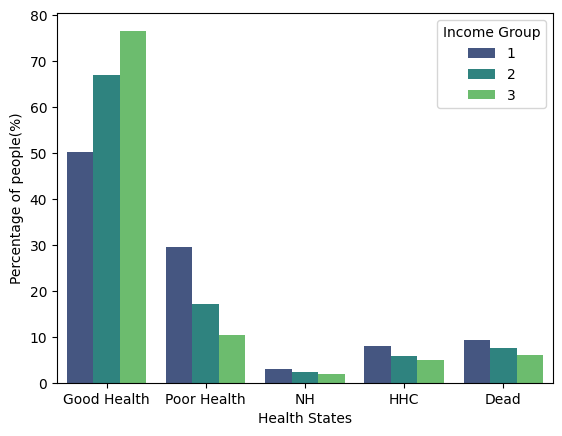

In [ ]:
df3.rename(columns={'variable':'Health States','value':'Percentage of people(%)','Inc_group':'Income Group'}, inplace=True)

ax = sns.barplot(data=df3, x = 'Health States', y = 'Percentage of people(%)', hue='Income Group', palette='viridis')


([<matplotlib.axis.XTick at 0x7bd62a7a8fd0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

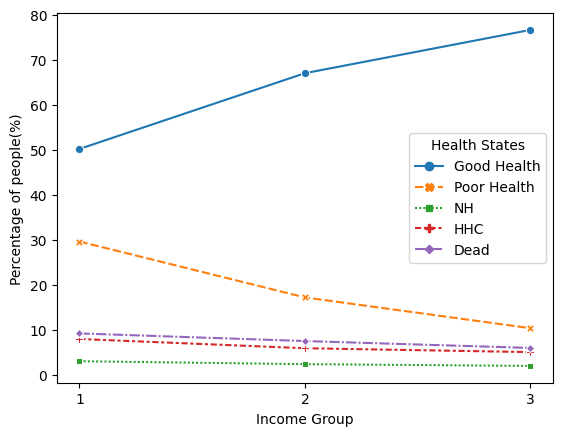

In [ ]:
ax = sns.lineplot(data=df3, x = 'Income Group', y ='Percentage of people(%)', hue='Health States', style='Health States',markers=True)
plt.xticks(np.arange(1, 4, step=1))

4.   Average life expectancy by gender and income group. - **<font color='#6495ED'>Aneesh Potnis, Aditya Pimpley<font>**

      x-axis --> Income Group\
      y-axis --> Age\
      hue --> Gender

      The second visualization maps the average life expectancy of males and females belonging to each income group.

      The hypothesis is women always tend to live longer than men in their income group.

      Curiously, but for women in income group 2 they live longer than men in income group 3. So another hypothesis could be that if you are above a certain income group then women live longer than men no matter the income and
      the higher the income for women they live longer still.

In [ ]:
df4['Weighted_avg'] = df4['Age'] * df4['Dead to Dead']
# df4 = df4.groupby(by=['Inc_group']).sum()
df4 = df4.groupby(by=['Inc_group','Gender']).sum()

df4['Weighted_avg'] = df4['Weighted_avg'] / df4['Dead to Dead']
df4[['Weighted_avg']]

Weighted_avg
Inc_group Gender              
1         female     75.527977
          male       73.659551
2         female     79.919652
          male       76.357476
3         female     82.436809
          male       78.950459

([<matplotlib.axis.XTick at 0x7bd62a6b9840>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

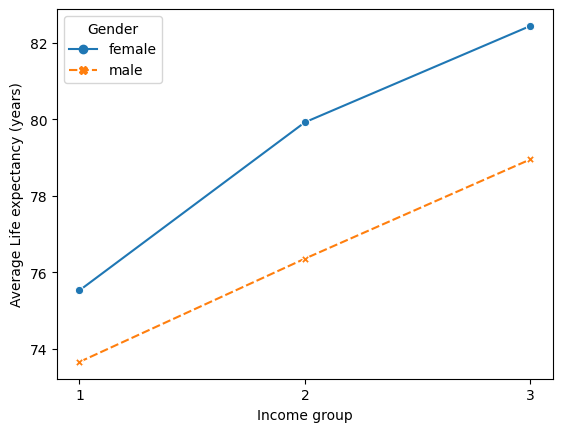

In [ ]:
df4.reset_index(inplace=True)

df4.rename(columns={'Inc_group':'Income group','Weighted_avg':'Average Life expectancy (years)'}, inplace=True)

# ax = sns.lineplot(data=df4, x = 'Inc_group', y ='Weighted_avg',markers=True)
ax = sns.lineplot(data=df4, x = 'Income group', y ='Average Life expectancy (years)',hue='Gender',style='Gender',markers=True)

plt.xticks(np.arange(1, 4, step=1))

5. Health State Distribution - <font color='#6495ED'>Munukutla Durga Venkata Kashyap, Sai Mahesh Vemulapalli</font>

  There are a total of 5 Pie-Charts each describing how the people from each state transcend to the other states.

  The last big visualization is the combination of all the Pie-Charts.

  The hypothesis is that the chances of a healthier person to stay healthy for a long time is higher than a person who has poor health or is in a nursing home or a home healthcare.

  we also believe that younger persons generally have a propensity for maintaining good health and experiencing a comparatively reduced mortality rate in comparison to their older counterparts.

In [ ]:
data = pd.read_csv("count_by_all_dimensions_for_high_level_model_v2.csv")
data.head(5)

,Unnamed: 0,Age,Inc_group,Gender,Dead to Dead,Dead to Good Health,Dead to Poor Health,Dead to NH,Dead to HHC,Good Health to Dead,...,NH to HHC,HHC to Dead,HHC to Good Health,HHC to Poor Health,HHC to NH,HHC to HHC,Good Health at t,Bad Health at t,NH at t,HHC at t
0,0,50,1,1.male,4,0,0,0,0,2,...,0,2,2,2,0,5,149,95,1,11
1,1,51,1,1.male,7,0,0,0,0,2,...,0,1,5,10,1,7,309,193,1,24
2,2,52,1,1.male,7,0,0,0,0,9,...,0,4,9,7,0,19,418,273,0,39
3,3,53,1,1.male,8,0,0,0,0,9,...,0,10,8,14,2,15,572,351,2,49
4,4,54,1,1.male,14,0,0,0,0,3,...,0,6,18,21,0,18,641,418,1,63


In [ ]:
print(data.columns)

Index(['Unnamed: 0', 'Age', 'Inc_group', 'Gender', 'Dead to Dead',
       'Dead to Good Health', 'Dead to Poor Health', 'Dead to NH',
       'Dead to HHC', 'Good Health to Dead', 'Good Health to Good Health',
       'Good Health to Poor Health', 'Good Health to NH', 'Good Health to HHC',
       'Poor Health to Dead', 'Poor Health to Good Health',
       'Poor Health to Poor Health', 'Poor Health to NH', 'Poor Health to HHC',
       'NH to Dead', 'NH to Good Health', 'NH to Poor Health', 'NH to NH',
       'NH to HHC', 'HHC to Dead', 'HHC to Good Health', 'HHC to Poor Health',
       'HHC to NH', 'HHC to HHC', 'Good Health at t', 'Bad Health at t',
       'NH at t', 'HHC at t'],
      dtype='object')


In [ ]:
healthy_cols = []
nursing_cols = []
poor_health_cols = []
hhc_cols = []

for col in data.columns:
    if "Good Health to" in col:
        healthy_cols.append(col)
        continue
    if "NH to" in col:
        nursing_cols.append(col)
        continue
    if "Poor Health to" in col:
        poor_health_cols.append(col)
        continue
    if "HHC to" in col:
        hhc_cols.append(col)
        continue

In [ ]:
print(healthy_cols)
print(nursing_cols)
print(poor_health_cols)
print(hhc_cols)

['Good Health to Dead', 'Good Health to Good Health', 'Good Health to Poor Health', 'Good Health to NH', 'Good Health to HHC']
['NH to Dead', 'NH to Good Health', 'NH to Poor Health', 'NH to NH', 'NH to HHC']
['Poor Health to Dead', 'Poor Health to Good Health', 'Poor Health to Poor Health', 'Poor Health to NH', 'Poor Health to HHC']
['HHC to Dead', 'HHC to Good Health', 'HHC to Poor Health', 'HHC to NH', 'HHC to HHC']


In [ ]:
healthy_count = 0
nursing_count = 0
poor_health_count = 0
hhc_count = 0
dead_count = 0

for col in data.columns:
    if col in healthy_cols:
        healthy_count += data[col].sum()
        continue
    if col in nursing_cols:
        nursing_count += data[col].sum()
        continue
    if col in poor_health_cols:
        poor_health_count += data[col].sum()
        continue
    if col in hhc_cols:
        hhc_count += data[col].sum()
        continue
    if "Dead to" in col:
        dead_count += data[col].sum()

In [ ]:
print(healthy_count)
print(nursing_count)
print(poor_health_count)
print(hhc_count)
print(dead_count)

total = healthy_count+nursing_count+poor_health_count+hhc_count+dead_count
print(total)

157397
4313
55403
15969
5276
238358


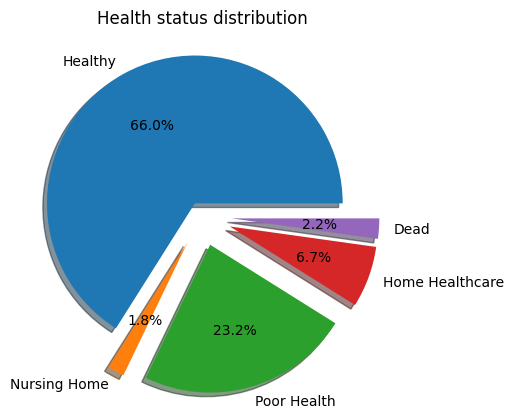

In [ ]:
labels = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes = [(healthy_count/total)*100,(nursing_count/total)*100,(poor_health_count/total)*100,(hhc_count/total)*100,(dead_count/total)*100]
explode = [0.1,0.2,0.2,0.2,0.2]

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Health status distribution")
plt.show()

The above visualization shows the percentage of people moving to other states.

In [ ]:
healthy_to_other = []
for col in healthy_cols:
    healthy_to_other.append(data[col].sum())

healthy_to_dead = healthy_to_other[0]
healthy_to_healthy = healthy_to_other[1]
healthy_to_poor_health = healthy_to_other[2]
healthy_to_nh = healthy_to_other[3]
healthy_to_hhc = healthy_to_other[4]

print(healthy_to_dead)
print(healthy_to_healthy)
print(healthy_to_poor_health)
print(healthy_to_nh)
print(healthy_to_hhc)

healthy_total = 0
for i in healthy_to_other:
    healthy_total += i

if healthy_total == healthy_count:
    print("The counts match up for Good Health")
else:
    print("The counts do not match up for Good Health")

4691
128374
16706
1362
6264
The counts match up for Good Health


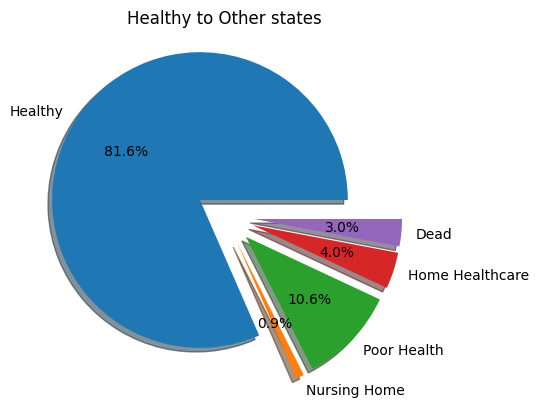

In [ ]:
labels_new = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes_new = [(healthy_to_healthy/healthy_total)*100,(healthy_to_nh/healthy_total)*100,(healthy_to_poor_health/healthy_total)*100,(healthy_to_hhc/healthy_total)*100,(healthy_to_dead/healthy_total)*100]
explode_new = [0.2,0.2,0.2,0.2,0.2]

fig_new, ax_new = plt.subplots()
ax_new.pie(sizes_new, explode=explode_new, labels=labels_new, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Healthy to Other states")
plt.show()

The above visualization shows the percentage of healthy people moving to other states. From the numbers we can see that 81.6% of the total healthy people have moved to other states

In [ ]:
poor_health_to_other = []
for col in poor_health_cols:
    poor_health_to_other.append(data[col].sum())

poor_health_to_dead = poor_health_to_other[0]
poor_health_to_healthy = poor_health_to_other[1]
poor_health_to_poor_health = poor_health_to_other[2]
poor_health_to_nh = poor_health_to_other[3]
poor_health_to_hhc = poor_health_to_other[4]

print(poor_health_to_dead)
print(poor_health_to_healthy)
print(poor_health_to_poor_health)
print(poor_health_to_nh)
print(poor_health_to_hhc)

poor_health_total = 0
for i in poor_health_to_other:
    poor_health_total += i

if poor_health_total == poor_health_count:
    print("The counts match up for Poor Health")
else:
    print("The counts do not match up for Poor Health")

4762
13509
30649
1362
5121
The counts match up for Poor Health


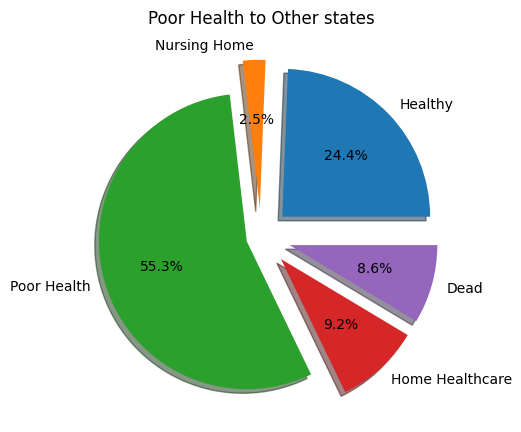

In [ ]:
labels_new_2 = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes_new_2 = [(poor_health_to_healthy/poor_health_total)*100,(poor_health_to_nh/poor_health_total)*100,
             (poor_health_to_poor_health/poor_health_total)*100,(poor_health_to_hhc/poor_health_total)*100,(poor_health_to_dead/poor_health_total)*100]
explode_new_2 = [0.2,0.2,0.1,0.2,0.2]

fig_new_2, ax_new_2 = plt.subplots()
ax_new_2.pie(sizes_new_2, explode=explode_new_2, labels=labels_new_2, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Poor Health to Other states\n")
plt.show()

The above visualization shows the percentage of Poor Health people moving to other states. From the numbers we can see that 55.3% of the total Poor Health people have moved to other states

In [ ]:
nursing_to_other = []
for col in nursing_cols:
    nursing_to_other.append(data[col].sum())

nursing_to_dead = nursing_to_other[0]
nursing_to_healthy = nursing_to_other[1]
nursing_to_poor_health = nursing_to_other[2]
nursing_to_nh = nursing_to_other[3]
nursing_to_hhc = nursing_to_other[4]

print(nursing_to_dead)
print(nursing_to_healthy)
print(nursing_to_poor_health)
print(nursing_to_nh)
print(nursing_to_hhc)

nursing_total = 0
for i in nursing_to_other:
    nursing_total += i

if nursing_total == nursing_count:
    print("The counts match up for Nursing Home")
else:
    print("The counts do not match up for Nursing Home")

1662
113
136
2277
125
The counts match up for Nursing Home


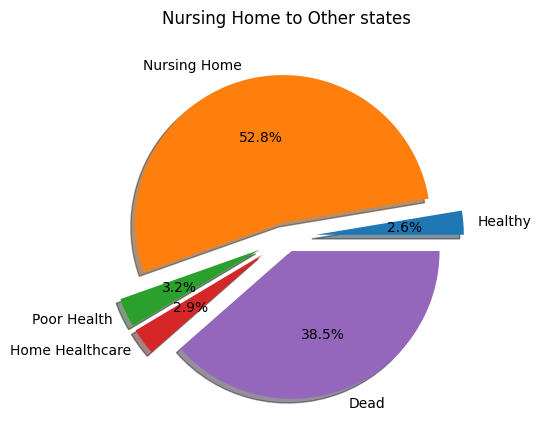

In [ ]:
labels_new_3 = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes_new_3 = [(nursing_to_healthy/nursing_total)*100,(nursing_to_nh/nursing_total)*100,
             (nursing_to_poor_health/nursing_total)*100,(nursing_to_hhc/nursing_total)*100,(nursing_to_dead/nursing_total)*100]
explode_new_3 = [0.2,0.1,0.2,0.2,0.1]

fig_new_3, ax_new_3 = plt.subplots()
ax_new_3.pie(sizes_new_3, explode=explode_new_3, labels=labels_new_3, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Nursing Home to Other states\n")
plt.show()

The above visualization shows the percentage of Nursing home people moving to other states. From the numbers we can see that 52.8% of the total Nursing people have moved to other states while 38.5 percent have died

In [ ]:
hhc_to_other = []
for col in hhc_cols:
    hhc_to_other.append(data[col].sum())

hhc_to_dead = hhc_to_other[0]
hhc_to_healthy = hhc_to_other[1]
hhc_to_poor_health = hhc_to_other[2]
hhc_to_nh = hhc_to_other[3]
hhc_to_hhc = hhc_to_other[4]

print(hhc_to_dead)
print(hhc_to_healthy)
print(hhc_to_poor_health)
print(hhc_to_nh)
print(hhc_to_hhc)

hhc_total = 0
for i in hhc_to_other:
    hhc_total += i

if hhc_total == hhc_count:
    print("The counts match up for Home Healthcare")
else:
    print("The counts do not match up for Home Healthcare")

2600
4114
3678
1179
4398
The counts match up for Home Healthcare


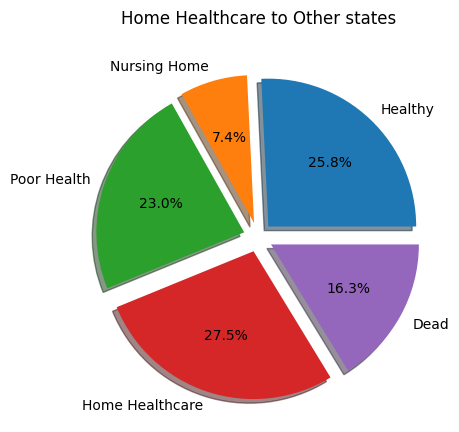

In [ ]:
labels_new_4 = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes_new_4 = [(hhc_to_healthy/hhc_total)*100,(hhc_to_nh/hhc_total)*100,
             (hhc_to_poor_health/hhc_total)*100,(hhc_to_hhc/hhc_total)*100,(hhc_to_dead/hhc_total)*100]
explode_new_4 = [0.1,0.1,0.1,0.1,0.1]

fig_new_4, ax_new_4 = plt.subplots()
ax_new_4.pie(sizes_new_4, explode=explode_new_4, labels=labels_new_4, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Home Healthcare to Other states\n")
plt.show()

Nursing Home to Other States

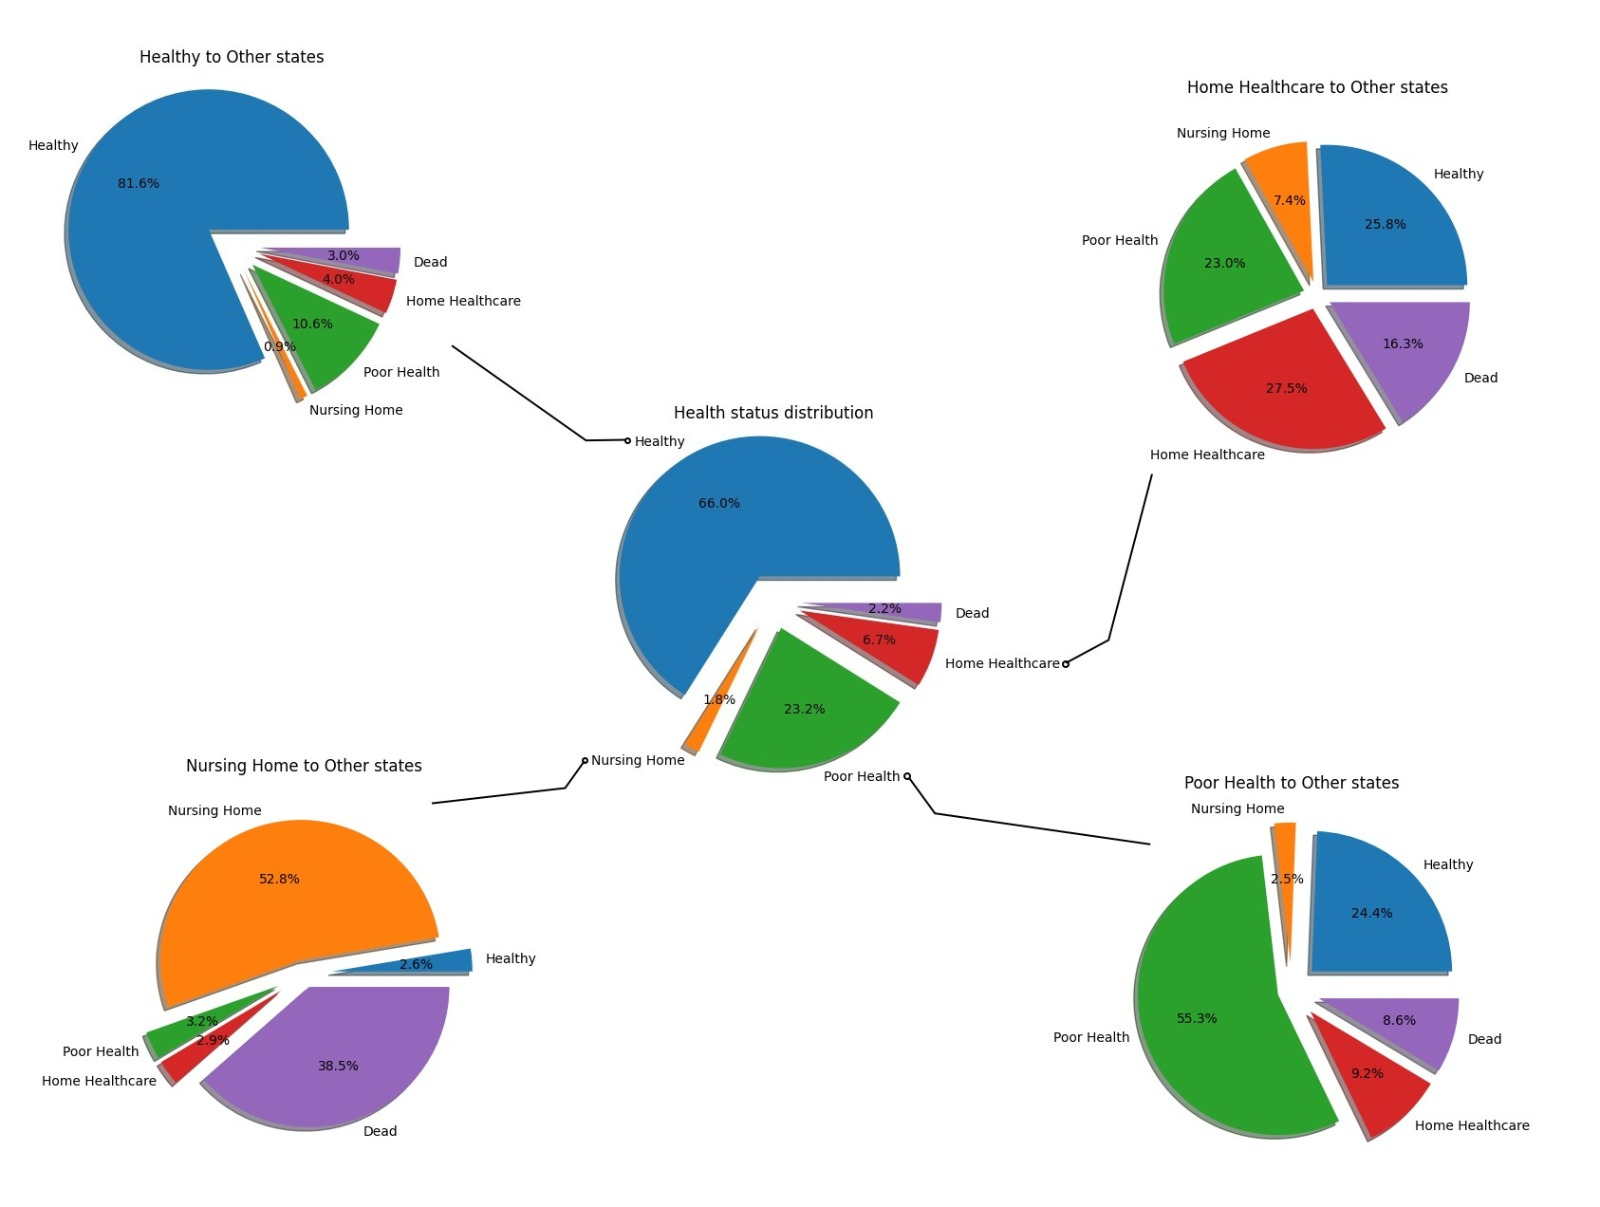

This is the overall Visualization combining all the possible ways people have transcended to other states.

The hypothesis is that the chances of a healthier person to stay healthy for a long time is higher than a person who has poor health or is in a nursing home or a home healthcare.

We also believe that younger persons generally have a propensity for maintaining good health and experiencing a comparatively reduced mortality rate in comparison to their older counterparts.

**Insight:**<br>
 From the above visualization depicting the percentages of individuals transitioning to different health states given their present health state, we can gleam a few insights. First, we see that individuals who are healthy also tend to remain healthy. Next, the individuals who are in nursing homes are more susceptible to die in the next wave of data collection compared to other individuals, and finally the chance for a person in any of the health states other than "Healthy" to return to "Healthy" state again is significantly low.

 6. Health Status Distribution at age 51 - <font color='#6495ED'>Munukutla Durga Venkata Kashyap, Sai Mahesh Vemulapalli</font>

  There are a total of 5 Pie-Charts each describing how the people of age 51 from each state transcend to the other states.

  The hypothesis is that the chances of a healthier 51 year old person to stay healthy for a while is higher than a person who has poor health or is in a nursing home or a home healthcare.

  The last big visualization is the combination of all the Pie-Charts.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("count_by_all_dimensions_for_high_level_model_v2.csv")
data.head(5)

,Unnamed: 0,Age,Inc_group,Gender,Dead to Dead,Dead to Good Health,Dead to Poor Health,Dead to NH,Dead to HHC,Good Health to Dead,...,NH to HHC,HHC to Dead,HHC to Good Health,HHC to Poor Health,HHC to NH,HHC to HHC,Good Health at t,Bad Health at t,NH at t,HHC at t
0,0,50,1,1.male,4,0,0,0,0,2,...,0,2,2,2,0,5,149,95,1,11
1,1,51,1,1.male,7,0,0,0,0,2,...,0,1,5,10,1,7,309,193,1,24
2,2,52,1,1.male,7,0,0,0,0,9,...,0,4,9,7,0,19,418,273,0,39
3,3,53,1,1.male,8,0,0,0,0,9,...,0,10,8,14,2,15,572,351,2,49
4,4,54,1,1.male,14,0,0,0,0,3,...,0,6,18,21,0,18,641,418,1,63


In [ ]:
print(data.columns)

Index(['Unnamed: 0', 'Age', 'Inc_group', 'Gender', 'Dead to Dead',
       'Dead to Good Health', 'Dead to Poor Health', 'Dead to NH',
       'Dead to HHC', 'Good Health to Dead', 'Good Health to Good Health',
       'Good Health to Poor Health', 'Good Health to NH', 'Good Health to HHC',
       'Poor Health to Dead', 'Poor Health to Good Health',
       'Poor Health to Poor Health', 'Poor Health to NH', 'Poor Health to HHC',
       'NH to Dead', 'NH to Good Health', 'NH to Poor Health', 'NH to NH',
       'NH to HHC', 'HHC to Dead', 'HHC to Good Health', 'HHC to Poor Health',
       'HHC to NH', 'HHC to HHC', 'Good Health at t', 'Bad Health at t',
       'NH at t', 'HHC at t'],
      dtype='object')


In [ ]:
data[data['Age']==51].head(5)

,Unnamed: 0,Age,Inc_group,Gender,Dead to Dead,Dead to Good Health,Dead to Poor Health,Dead to NH,Dead to HHC,Good Health to Dead,...,NH to HHC,HHC to Dead,HHC to Good Health,HHC to Poor Health,HHC to NH,HHC to HHC,Good Health at t,Bad Health at t,NH at t,HHC at t
1,1,51,1,1.male,7,0,0,0,0,2,...,0,1,5,10,1,7,309,193,1,24
51,1,51,2,1.male,3,0,0,0,0,5,...,0,0,4,1,0,2,409,82,0,7
101,1,51,3,1.male,0,0,0,0,0,1,...,0,1,4,2,0,2,478,32,0,9
151,1,51,1,2.female,6,0,0,0,0,7,...,0,2,7,25,0,12,924,438,2,46
201,1,51,2,2.female,0,0,0,0,0,0,...,0,1,4,3,0,1,785,101,0,9


In [ ]:
data = data[data['Age']==51]
data.head(5)

,Unnamed: 0,Age,Inc_group,Gender,Dead to Dead,Dead to Good Health,Dead to Poor Health,Dead to NH,Dead to HHC,Good Health to Dead,...,NH to HHC,HHC to Dead,HHC to Good Health,HHC to Poor Health,HHC to NH,HHC to HHC,Good Health at t,Bad Health at t,NH at t,HHC at t
1,1,51,1,1.male,7,0,0,0,0,2,...,0,1,5,10,1,7,309,193,1,24
51,1,51,2,1.male,3,0,0,0,0,5,...,0,0,4,1,0,2,409,82,0,7
101,1,51,3,1.male,0,0,0,0,0,1,...,0,1,4,2,0,2,478,32,0,9
151,1,51,1,2.female,6,0,0,0,0,7,...,0,2,7,25,0,12,924,438,2,46
201,1,51,2,2.female,0,0,0,0,0,0,...,0,1,4,3,0,1,785,101,0,9


In [ ]:
healthy_cols = []
nursing_cols = []
poor_health_cols = []
hhc_cols = []

for col in data.columns:
    if "Good Health to" in col:
        healthy_cols.append(col)
        continue
    if "NH to" in col:
        nursing_cols.append(col)
        continue
    if "Poor Health to" in col:
        poor_health_cols.append(col)
        continue
    if "HHC to" in col:
        hhc_cols.append(col)
        continue

In [ ]:
print(healthy_cols)
print(nursing_cols)
print(poor_health_cols)
print(hhc_cols)

['Good Health to Dead', 'Good Health to Good Health', 'Good Health to Poor Health', 'Good Health to NH', 'Good Health to HHC']
['NH to Dead', 'NH to Good Health', 'NH to Poor Health', 'NH to NH', 'NH to HHC']
['Poor Health to Dead', 'Poor Health to Good Health', 'Poor Health to Poor Health', 'Poor Health to NH', 'Poor Health to HHC']
['HHC to Dead', 'HHC to Good Health', 'HHC to Poor Health', 'HHC to NH', 'HHC to HHC']


In [ ]:
healthy_count = 0
nursing_count = 0
poor_health_count = 0
hhc_count = 0
dead_count = 0

for col in data.columns:
    if col in healthy_cols:
        healthy_count += data[col].sum()
        continue
    if col in nursing_cols:
        nursing_count += data[col].sum()
        continue
    if col in poor_health_cols:
        poor_health_count += data[col].sum()
        continue
    if col in hhc_cols:
        hhc_count += data[col].sum()
        continue
    if "Dead to" in col:
        dead_count += data[col].sum()

In [ ]:
print(healthy_count)
print(nursing_count)
print(poor_health_count)
print(hhc_count)
print(dead_count)

total = healthy_count+nursing_count+poor_health_count+hhc_count+dead_count
print(total)

3320
3
880
103
17
4323


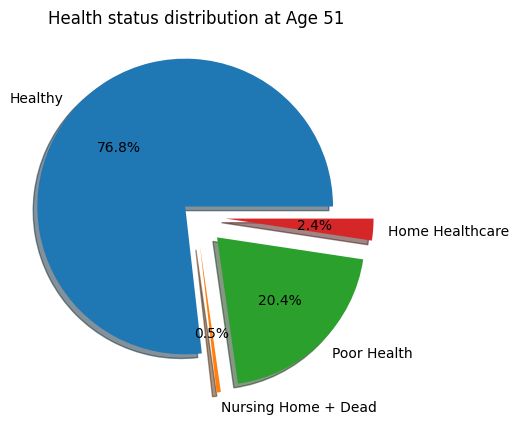

In [ ]:
labels = ['Healthy','Nursing Home + Dead','Poor Health','Home Healthcare']
sizes = [(healthy_count/total)*100,((nursing_count+dead_count)/total)*100,(poor_health_count/total)*100,(hhc_count/total)*100]
explode = [0.1,0.2,0.2,0.2]

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Health status distribution at Age 51")
plt.show()

Health Status Distribution at Age 51

In [ ]:
healthy_to_other = []
for col in healthy_cols:
    healthy_to_other.append(data[col].sum())

healthy_to_dead = healthy_to_other[0]
healthy_to_healthy = healthy_to_other[1]
healthy_to_poor_health = healthy_to_other[2]
healthy_to_nh = healthy_to_other[3]
healthy_to_hhc = healthy_to_other[4]

print(healthy_to_dead)
print(healthy_to_healthy)
print(healthy_to_poor_health)
print(healthy_to_nh)
print(healthy_to_hhc)

healthy_total = 0
for i in healthy_to_other:
    healthy_total += i

if healthy_total == healthy_count:
    print("The counts match up for Good Health")
else:
    print("The counts do not match up for Good Health")

15
2978
285
1
41
The counts match up for Good Health


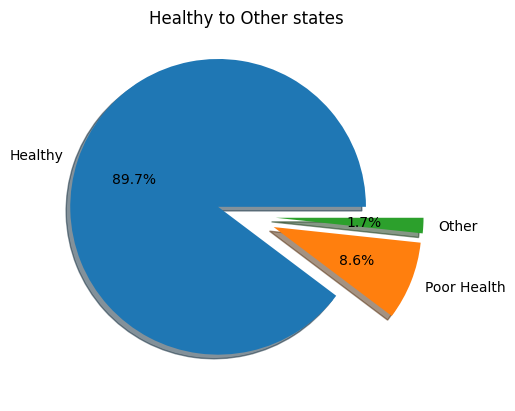

In [ ]:
labels_new = ['Healthy','Poor Health','Other']
sizes_new = [(healthy_to_healthy/healthy_total)*100,(healthy_to_poor_health/healthy_total)*100,((healthy_to_hhc+healthy_to_dead)/healthy_total)*100]
explode_new = [0.2,0.2,0.2]

fig_new, ax_new = plt.subplots()
ax_new.pie(sizes_new, explode=explode_new, labels=labels_new, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Healthy to Other states")
plt.show()

Healthy to Other States

In [ ]:
poor_health_to_other = []
for col in poor_health_cols:
    poor_health_to_other.append(data[col].sum())

poor_health_to_dead = poor_health_to_other[0]
poor_health_to_healthy = poor_health_to_other[1]
poor_health_to_poor_health = poor_health_to_other[2]
poor_health_to_nh = poor_health_to_other[3]
poor_health_to_hhc = poor_health_to_other[4]

print(poor_health_to_dead)
print(poor_health_to_healthy)
print(poor_health_to_poor_health)
print(poor_health_to_nh)
print(poor_health_to_hhc)

poor_health_total = 0
for i in poor_health_to_other:
    poor_health_total += i

if poor_health_total == poor_health_count:
    print("The counts match up for Poor Health")
else:
    print("The counts do not match up for Poor Health")

19
285
543
2
31
The counts match up for Poor Health


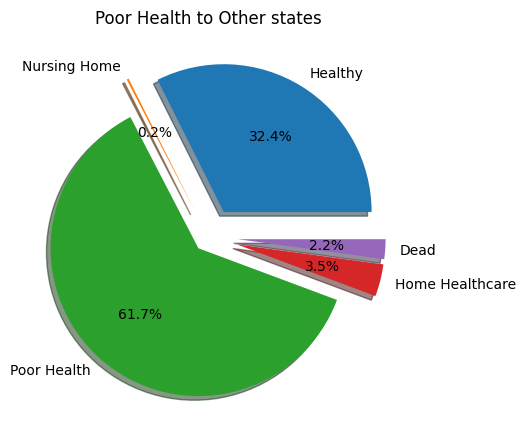

In [ ]:
labels_new_2 = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes_new_2 = [(poor_health_to_healthy/poor_health_total)*100,(poor_health_to_nh/poor_health_total)*100,
             (poor_health_to_poor_health/poor_health_total)*100,(poor_health_to_hhc/poor_health_total)*100,(poor_health_to_dead/poor_health_total)*100]
explode_new_2 = [0.2,0.2,0.1,0.2,0.2]

fig_new_2, ax_new_2 = plt.subplots()
ax_new_2.pie(sizes_new_2, explode=explode_new_2, labels=labels_new_2, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Poor Health to Other states\n")
plt.show()

Poor Health to Other states

In [ ]:
nursing_to_other = []
for col in nursing_cols:
    nursing_to_other.append(data[col].sum())

nursing_to_dead = nursing_to_other[0]
nursing_to_healthy = nursing_to_other[1]
nursing_to_poor_health = nursing_to_other[2]
nursing_to_nh = nursing_to_other[3]
nursing_to_hhc = nursing_to_other[4]

print(nursing_to_dead)
print(nursing_to_healthy)
print(nursing_to_poor_health)
print(nursing_to_nh)
print(nursing_to_hhc)

nursing_total = 0
for i in nursing_to_other:
    nursing_total += i

if nursing_total == nursing_count:
    print("The counts match up for Nursing Home")
else:
    print("The counts do not match up for Nursing Home")

0
0
1
2
0
The counts match up for Nursing Home


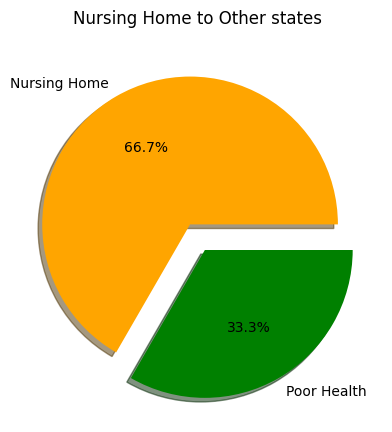

In [ ]:
labels_new_3 = ['Nursing Home','Poor Health']
sizes_new_3 = [(nursing_to_nh/nursing_total)*100,
             (nursing_to_poor_health/nursing_total)*100]
explode_new_3 = [0.1,0.1]
colors_new_3 = ['orange','green']

fig_new_3, ax_new_3 = plt.subplots()
ax_new_3.pie(sizes_new_3, explode=explode_new_3, labels=labels_new_3,colors=colors_new_3, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Nursing Home to Other states\n")
plt.show()

Nursing Home to Other states

In [ ]:
hhc_to_other = []
for col in hhc_cols:
    hhc_to_other.append(data[col].sum())

hhc_to_dead = hhc_to_other[0]
hhc_to_healthy = hhc_to_other[1]
hhc_to_poor_health = hhc_to_other[2]
hhc_to_nh = hhc_to_other[3]
hhc_to_hhc = hhc_to_other[4]

print(hhc_to_dead)
print(hhc_to_healthy)
print(hhc_to_poor_health)
print(hhc_to_nh)
print(hhc_to_hhc)

hhc_total = 0
for i in hhc_to_other:
    hhc_total += i

if hhc_total == hhc_count:
    print("The counts match up for Home Healthcare")
else:
    print("The counts do not match up for Home Healthcare")

5
30
42
1
25
The counts match up for Home Healthcare


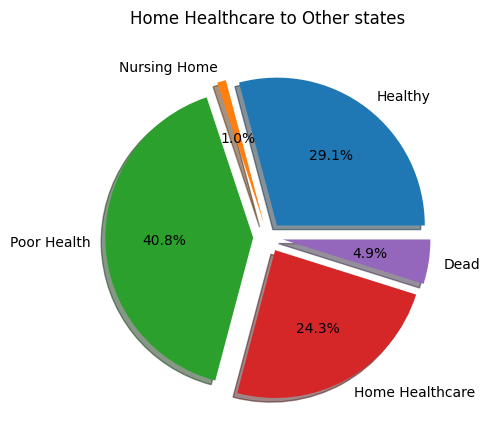

In [ ]:
labels_new_4 = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes_new_4 = [(hhc_to_healthy/hhc_total)*100,(hhc_to_nh/hhc_total)*100,
             (hhc_to_poor_health/hhc_total)*100,(hhc_to_hhc/hhc_total)*100,(hhc_to_dead/hhc_total)*100]
explode_new_4 = [0.1,0.1,0.1,0.1,0.1]

fig_new_4, ax_new_4 = plt.subplots()
ax_new_4.pie(sizes_new_4, explode=explode_new_4, labels=labels_new_4, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Home Healthcare to Other states\n")
plt.show()

Home Healthcare to Other states

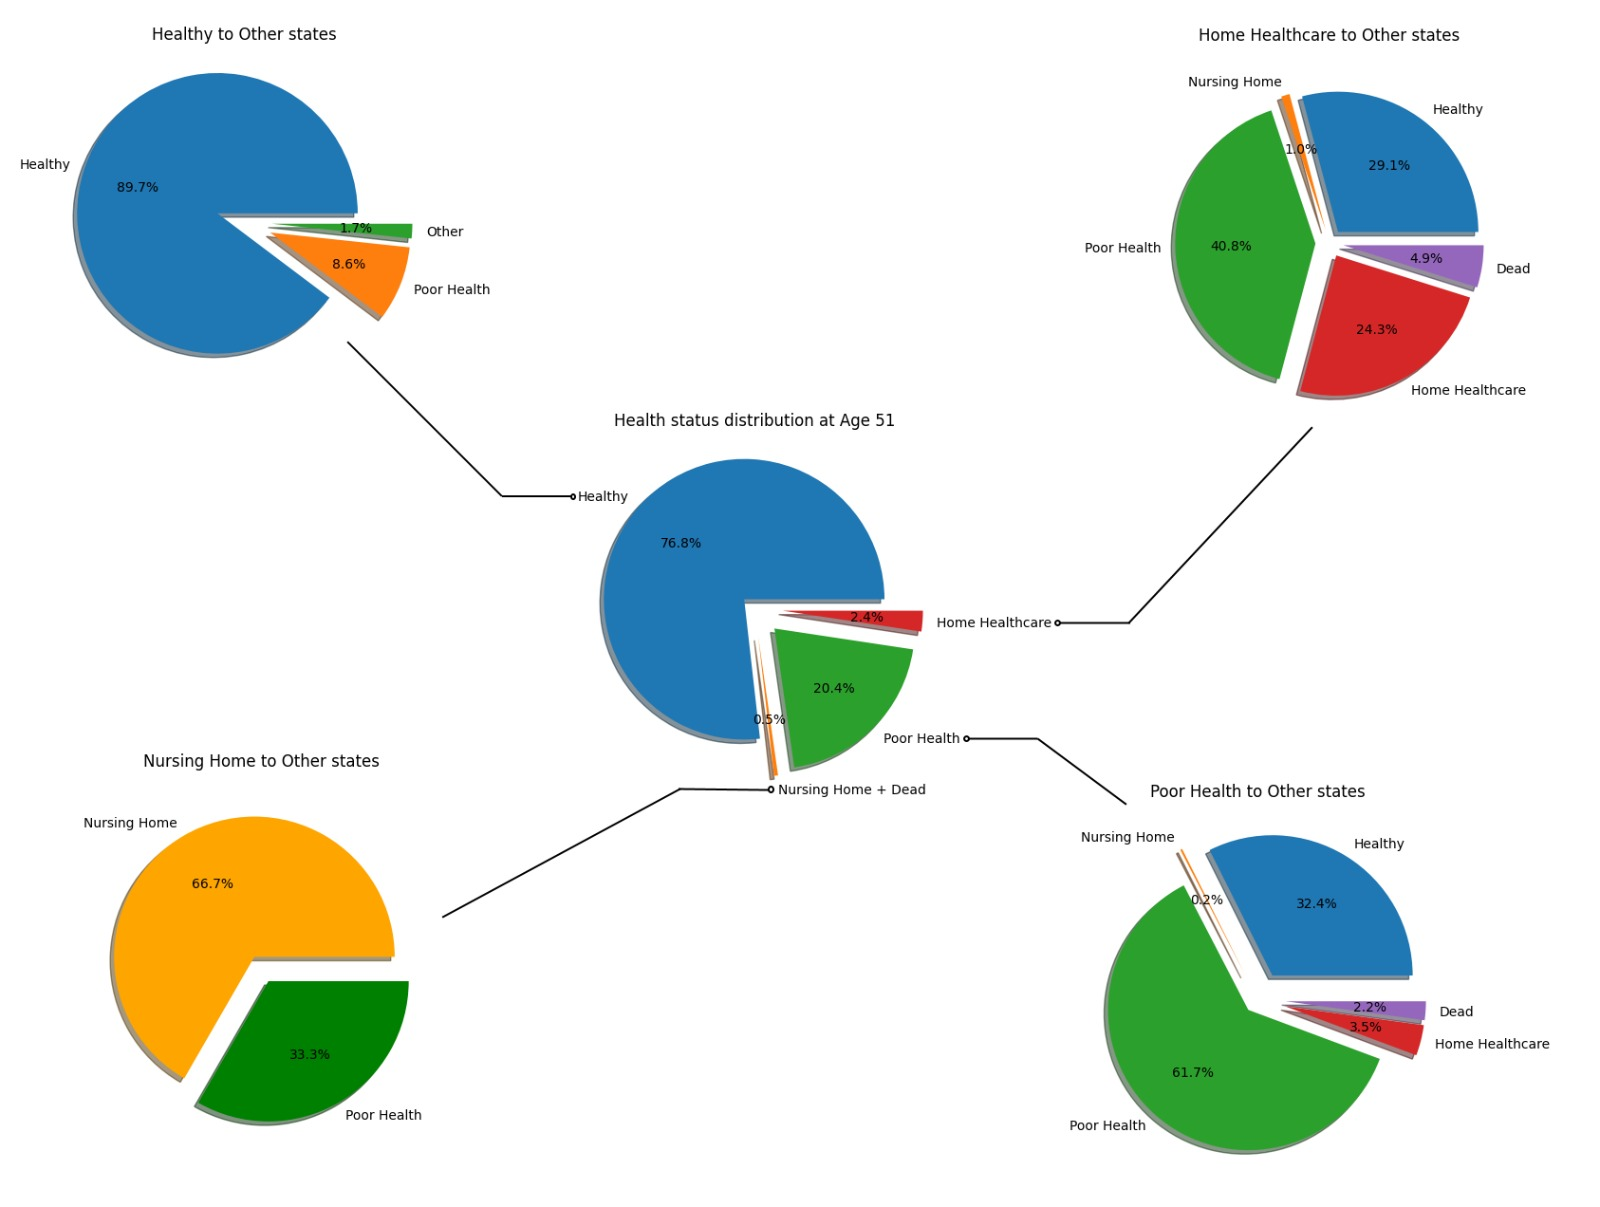

This is the overall Visualization combining all the possible ways people of age 51 have transcended to other states

The hypothesis is that the chances of a healthier 51 year old person to stay healthy for a while is higher than a person who has poor health or is in a nursing home or a home healthcare.

**Insight:**<br>
This visualization depicts the state change percentages for individuals of age 51. We can compare this depiction with that of the entire dataset. The initial insights are that the individuals in general are more concentrated in the healthy state, and that the number of individuals in nursing homes at this age is far lower. Upon further inspection, we can also observe that there is a higher percentage of individuals returning to healthy state from other states compared to the rest of the dataset, and there are a lot less individuals dying at this age. This supports our initial hypothesis that individuals at a lower age would have a lower risk of dying before the next wave of data collection compared to individuals of a higher age.

7. Health Status Distribution at age 91 - <font color='#6495ED'>Munukutla Durga Venkata Kashyap, Sai Mahesh Vemulapalli</font>

  There are a total of 5 Pie-Charts each describing how the people of age 91 from each state transcend to the other states.

  The hypothesis is that the chances of a healthier 91 year old person to go to a next state is higher and the chances of death increases for a person who has poor health or is in a nursing home or a home healthcare.

  The last big visualization is the combination of all the Pie-Charts.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("count_by_all_dimensions_for_high_level_model_v2.csv")
data.head(5)

,Unnamed: 0,Age,Inc_group,Gender,Dead to Dead,Dead to Good Health,Dead to Poor Health,Dead to NH,Dead to HHC,Good Health to Dead,...,NH to HHC,HHC to Dead,HHC to Good Health,HHC to Poor Health,HHC to NH,HHC to HHC,Good Health at t,Bad Health at t,NH at t,HHC at t
0,0,50,1,1.male,4,0,0,0,0,2,...,0,2,2,2,0,5,149,95,1,11
1,1,51,1,1.male,7,0,0,0,0,2,...,0,1,5,10,1,7,309,193,1,24
2,2,52,1,1.male,7,0,0,0,0,9,...,0,4,9,7,0,19,418,273,0,39
3,3,53,1,1.male,8,0,0,0,0,9,...,0,10,8,14,2,15,572,351,2,49
4,4,54,1,1.male,14,0,0,0,0,3,...,0,6,18,21,0,18,641,418,1,63


In [ ]:
print(data.columns)

Index(['Unnamed: 0', 'Age', 'Inc_group', 'Gender', 'Dead to Dead',
       'Dead to Good Health', 'Dead to Poor Health', 'Dead to NH',
       'Dead to HHC', 'Good Health to Dead', 'Good Health to Good Health',
       'Good Health to Poor Health', 'Good Health to NH', 'Good Health to HHC',
       'Poor Health to Dead', 'Poor Health to Good Health',
       'Poor Health to Poor Health', 'Poor Health to NH', 'Poor Health to HHC',
       'NH to Dead', 'NH to Good Health', 'NH to Poor Health', 'NH to NH',
       'NH to HHC', 'HHC to Dead', 'HHC to Good Health', 'HHC to Poor Health',
       'HHC to NH', 'HHC to HHC', 'Good Health at t', 'Bad Health at t',
       'NH at t', 'HHC at t'],
      dtype='object')


In [ ]:
data[data['Age']==91].head(5)

,Unnamed: 0,Age,Inc_group,Gender,Dead to Dead,Dead to Good Health,Dead to Poor Health,Dead to NH,Dead to HHC,Good Health to Dead,...,NH to HHC,HHC to Dead,HHC to Good Health,HHC to Poor Health,HHC to NH,HHC to HHC,Good Health at t,Bad Health at t,NH at t,HHC at t
41,41,91,1,1.male,16,0,0,0,0,9,...,0,13,4,0,3,4,38,27,15,24
91,41,91,2,1.male,21,0,0,0,0,17,...,0,6,1,1,3,2,44,22,19,13
141,41,91,3,1.male,15,0,0,0,0,13,...,0,7,1,2,1,8,49,24,17,19
191,41,91,1,2.female,19,0,0,0,0,15,...,1,18,5,11,15,12,77,68,68,61
241,41,91,2,2.female,18,0,0,0,0,21,...,3,13,11,6,14,11,112,44,51,55


In [ ]:
data = data[data['Age']==91]
data.head(5)

,Unnamed: 0,Age,Inc_group,Gender,Dead to Dead,Dead to Good Health,Dead to Poor Health,Dead to NH,Dead to HHC,Good Health to Dead,...,NH to HHC,HHC to Dead,HHC to Good Health,HHC to Poor Health,HHC to NH,HHC to HHC,Good Health at t,Bad Health at t,NH at t,HHC at t
41,41,91,1,1.male,16,0,0,0,0,9,...,0,13,4,0,3,4,38,27,15,24
91,41,91,2,1.male,21,0,0,0,0,17,...,0,6,1,1,3,2,44,22,19,13
141,41,91,3,1.male,15,0,0,0,0,13,...,0,7,1,2,1,8,49,24,17,19
191,41,91,1,2.female,19,0,0,0,0,15,...,1,18,5,11,15,12,77,68,68,61
241,41,91,2,2.female,18,0,0,0,0,21,...,3,13,11,6,14,11,112,44,51,55


In [ ]:
healthy_cols = []
nursing_cols = []
poor_health_cols = []
hhc_cols = []

for col in data.columns:
    if "Good Health to" in col:
        healthy_cols.append(col)
        continue
    if "NH to" in col:
        nursing_cols.append(col)
        continue
    if "Poor Health to" in col:
        poor_health_cols.append(col)
        continue
    if "HHC to" in col:
        hhc_cols.append(col)
        continue

In [ ]:
print(healthy_cols)
print(nursing_cols)
print(poor_health_cols)
print(hhc_cols)

['Good Health to Dead', 'Good Health to Good Health', 'Good Health to Poor Health', 'Good Health to NH', 'Good Health to HHC']
['NH to Dead', 'NH to Good Health', 'NH to Poor Health', 'NH to NH', 'NH to HHC']
['Poor Health to Dead', 'Poor Health to Good Health', 'Poor Health to Poor Health', 'Poor Health to NH', 'Poor Health to HHC']
['HHC to Dead', 'HHC to Good Health', 'HHC to Poor Health', 'HHC to NH', 'HHC to HHC']


In [ ]:
healthy_count = 0
nursing_count = 0
poor_health_count = 0
hhc_count = 0
dead_count = 0

for col in data.columns:
    if col in healthy_cols:
        healthy_count += data[col].sum()
        continue
    if col in nursing_cols:
        nursing_count += data[col].sum()
        continue
    if col in poor_health_cols:
        poor_health_count += data[col].sum()
        continue
    if col in hhc_cols:
        hhc_count += data[col].sum()
        continue
    if "Dead to" in col:
        dead_count += data[col].sum()

In [ ]:
print(healthy_count)
print(nursing_count)
print(poor_health_count)
print(hhc_count)
print(dead_count)

total = healthy_count+nursing_count+poor_health_count+hhc_count+dead_count
print(total)

396
193
213
210
103
1115


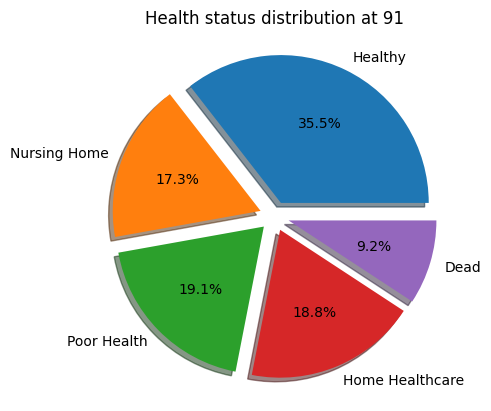

In [ ]:
labels = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes = [(healthy_count/total)*100,(nursing_count/total)*100,(poor_health_count/total)*100,(hhc_count/total)*100,(dead_count/total)*100]
explode = [0.1,0.1,0.1,0.1,0.1]

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Health status distribution at 91")
plt.show()

Health Status Distribution at 91

In [ ]:
healthy_to_other = []
for col in healthy_cols:
    healthy_to_other.append(data[col].sum())

healthy_to_dead = healthy_to_other[0]
healthy_to_healthy = healthy_to_other[1]
healthy_to_poor_health = healthy_to_other[2]
healthy_to_nh = healthy_to_other[3]
healthy_to_hhc = healthy_to_other[4]

print(healthy_to_dead)
print(healthy_to_healthy)
print(healthy_to_poor_health)
print(healthy_to_nh)
print(healthy_to_hhc)

healthy_total = 0
for i in healthy_to_other:
    healthy_total += i

if healthy_total == healthy_count:
    print("The counts match up for Good Health")
else:
    print("The counts do not match up for Good Health")

87
171
44
47
47
The counts match up for Good Health


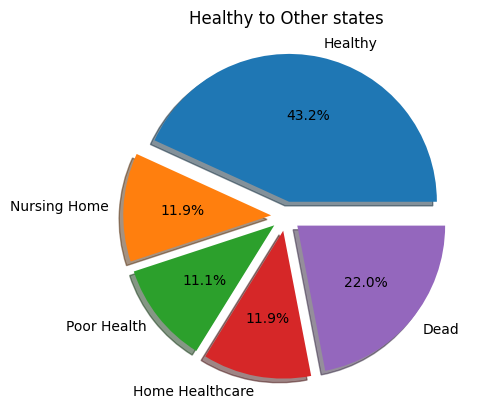

In [ ]:
labels_new = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes_new = [(healthy_to_healthy/healthy_total)*100,(healthy_to_nh/healthy_total)*100,(healthy_to_poor_health/healthy_total)*100,(healthy_to_hhc/healthy_total)*100,(healthy_to_dead/healthy_total)*100]
explode_new = [0.1,0.1,0.1,0.1,0.1]

fig_new, ax_new = plt.subplots()
ax_new.pie(sizes_new, explode=explode_new, labels=labels_new, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Healthy to Other states")
plt.show()

Healthy to Other States

In [ ]:
poor_health_to_other = []
for col in poor_health_cols:
    poor_health_to_other.append(data[col].sum())

poor_health_to_dead = poor_health_to_other[0]
poor_health_to_healthy = poor_health_to_other[1]
poor_health_to_poor_health = poor_health_to_other[2]
poor_health_to_nh = poor_health_to_other[3]
poor_health_to_hhc = poor_health_to_other[4]

print(poor_health_to_dead)
print(poor_health_to_healthy)
print(poor_health_to_poor_health)
print(poor_health_to_nh)
print(poor_health_to_hhc)

poor_health_total = 0
for i in poor_health_to_other:
    poor_health_total += i

if poor_health_total == poor_health_count:
    print("The counts match up for Poor Health")
else:
    print("The counts do not match up for Poor Health")

61
31
53
33
35
The counts match up for Poor Health


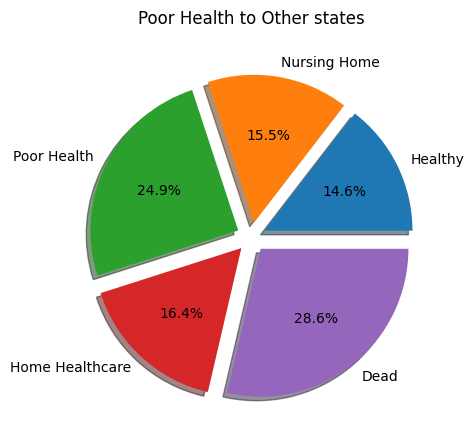

In [ ]:
labels_new_2 = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes_new_2 = [(poor_health_to_healthy/poor_health_total)*100,(poor_health_to_nh/poor_health_total)*100,
             (poor_health_to_poor_health/poor_health_total)*100,(poor_health_to_hhc/poor_health_total)*100,(poor_health_to_dead/poor_health_total)*100]
explode_new_2 = [0.1,0.1,0.1,0.1,0.1]

fig_new_2, ax_new_2 = plt.subplots()
ax_new_2.pie(sizes_new_2, explode=explode_new_2, labels=labels_new_2, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Poor Health to Other states\n")
plt.show()

Poor Health to Other States

In [ ]:
nursing_to_other = []
for col in nursing_cols:
    nursing_to_other.append(data[col].sum())

nursing_to_dead = nursing_to_other[0]
nursing_to_healthy = nursing_to_other[1]
nursing_to_poor_health = nursing_to_other[2]
nursing_to_nh = nursing_to_other[3]
nursing_to_hhc = nursing_to_other[4]

print(nursing_to_dead)
print(nursing_to_healthy)
print(nursing_to_poor_health)
print(nursing_to_nh)
print(nursing_to_hhc)

nursing_total = 0
for i in nursing_to_other:
    nursing_total += i

if nursing_total == nursing_count:
    print("The counts match up for Nursing Home")
else:
    print("The counts do not match up for Nursing Home")

88
5
1
95
4
The counts match up for Nursing Home


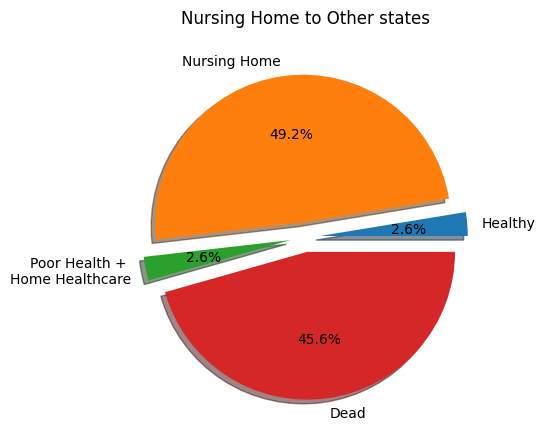

In [ ]:
labels_new_3 = ['Healthy','Nursing Home','Poor Health + \nHome Healthcare','Dead']
sizes_new_3 = [(nursing_to_healthy/nursing_total)*100,(nursing_to_nh/nursing_total)*100,
             ((nursing_to_hhc+nursing_to_poor_health)/nursing_total)*100,(nursing_to_dead/nursing_total)*100]
explode_new_3 = [0.1,0.1,0.1,0.1]

fig_new_3, ax_new_3 = plt.subplots()
ax_new_3.pie(sizes_new_3, explode=explode_new_3, labels=labels_new_3, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Nursing Home to Other states\n")
plt.show()

Nursing Home to Other states

In [ ]:
hhc_to_other = []
for col in hhc_cols:
    hhc_to_other.append(data[col].sum())

hhc_to_dead = hhc_to_other[0]
hhc_to_healthy = hhc_to_other[1]
hhc_to_poor_health = hhc_to_other[2]
hhc_to_nh = hhc_to_other[3]
hhc_to_hhc = hhc_to_other[4]

print(hhc_to_dead)
print(hhc_to_healthy)
print(hhc_to_poor_health)
print(hhc_to_nh)
print(hhc_to_hhc)

hhc_total = 0
for i in hhc_to_other:
    hhc_total += i

if hhc_total == hhc_count:
    print("The counts match up for Home Healthcare")
else:
    print("The counts do not match up for Home Healthcare")

71
28
21
44
46
The counts match up for Home Healthcare


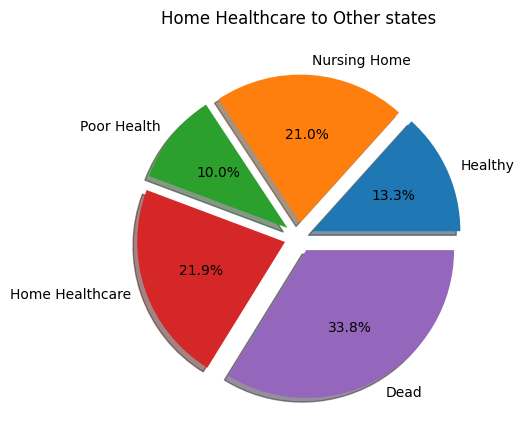

In [ ]:
labels_new_4 = ['Healthy','Nursing Home','Poor Health','Home Healthcare','Dead']
sizes_new_4 = [(hhc_to_healthy/hhc_total)*100,(hhc_to_nh/hhc_total)*100,
             (hhc_to_poor_health/hhc_total)*100,(hhc_to_hhc/hhc_total)*100,(hhc_to_dead/hhc_total)*100]
explode_new_4 = [0.1,0.1,0.1,0.1,0.1]

fig_new_4, ax_new_4 = plt.subplots()
ax_new_4.pie(sizes_new_4, explode=explode_new_4, labels=labels_new_4, autopct='%1.1f%%',shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.title("Home Healthcare to Other states\n")
plt.show()

Home Healthcare to Other states

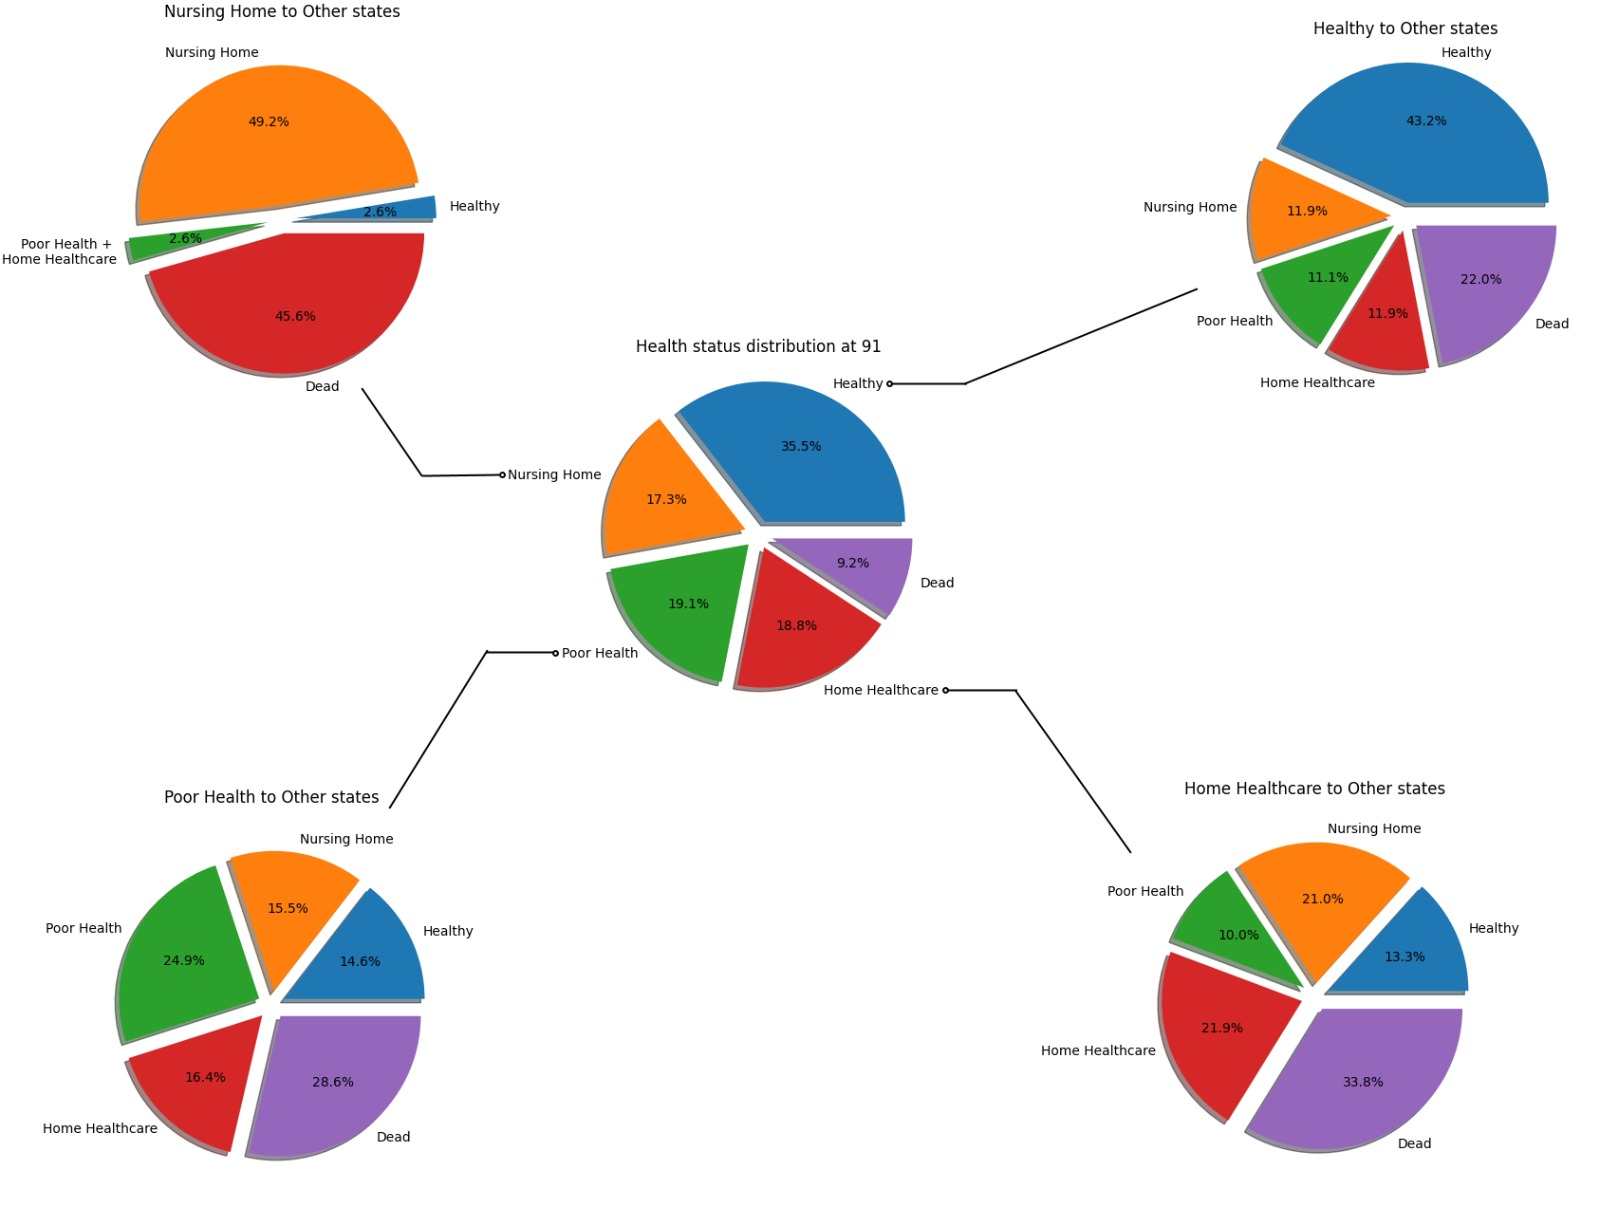



This is the overall Visualization combining all the possible ways people of age 91 have transcended to other states.

The hypothesis is that the chances of a healthier 91 year old person to go to a next state is higher and the chances of death increases for a person who has poor health or is in a nursing home or a home healthcare.

**Insight:**<br>
This visualization depicts the distribution and the percentage of individuals of age 91 transitioning between health states. Preliminary observation is that in the data, there are a lot more entries of the initial state "Dead" compared to the rest of the dataset. Further observation reveals that for these individuals, even if they are healthy, there is a greater than 50% chance that they would not remain healthy in the next 2 years. We can also observe that an even greater percentage of people die if they start off at the states "Nursing Home" and "Home Healthcare". All these observations are also in agreement with our hypothesis that older individuals would have a much higher risk of dying or getting seriously ill/requiring assistance than the rest of the dataset.

##**<font color='#6495ED'>ML Analyses:<font>**

1.  Linear Regression to predict life expectancy of an individual base on their current age,gender and income group  - **<font color='#6495ED'>Aneesh Potnis, Aditya Pimpley, Neksha Patel<font>**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/DS_Project"
!pwd

/content/drive/MyDrive/DS_Project
/content/drive/MyDrive/DS_Project


In [ ]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Loading the dataset

new_df = pd.read_csv('ds_project_complete_data.csv')
new_df

<ipython-input-79-091385ecfed2>:3: DtypeWarning: Columns (33,34,35,36,37,38,39,40,41,47,48,49,50,51,52,53,54,55,61,62,63,64,65,66,67,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv('ds_project_complete_data.csv')


,id,hhidpn,rabyear,r1agey_b,r2agey_b,r3agey_b,r4agey_b,r5agey_b,r6agey_b,r7agey_b,...,r5inc_group,r6inc_group,r7inc_group,r8inc_group,r9inc_group,r10inc_group,r11inc_group,r12inc_group,r13inc_group,r14inc_group
0,1.0,1010,1938.0,54.0,56.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2010,1934.0,57.0,59.0,62.0,63.0,65.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,3010,1936.0,56.0,58.0,60.0,62.0,64.0,66.0,68.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN
3,4.0,3020,1938.0,54.0,55.0,57.0,59.0,61.0,63.0,65.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN
4,5.0,10001010,1939.0,53.0,55.0,57.0,58.0,60.0,62.0,64.0,...,1.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42228,NaN,923525020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,1.0,2.0
42229,NaN,952836010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0
42230,NaN,958361010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,2.0,NaN
42231,NaN,959733010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [ ]:
# Cleaning the gender column

new_df['ragender'] = new_df['ragender'].apply(lambda x: x[2:])
new_df

,id,hhidpn,rabyear,r1agey_b,r2agey_b,r3agey_b,r4agey_b,r5agey_b,r6agey_b,r7agey_b,...,r5inc_group,r6inc_group,r7inc_group,r8inc_group,r9inc_group,r10inc_group,r11inc_group,r12inc_group,r13inc_group,r14inc_group
0,1.0,1010,1938.0,54.0,56.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2010,1934.0,57.0,59.0,62.0,63.0,65.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,3010,1936.0,56.0,58.0,60.0,62.0,64.0,66.0,68.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN
3,4.0,3020,1938.0,54.0,55.0,57.0,59.0,61.0,63.0,65.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN
4,5.0,10001010,1939.0,53.0,55.0,57.0,58.0,60.0,62.0,64.0,...,1.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42228,NaN,923525020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,1.0,2.0
42229,NaN,952836010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0
42230,NaN,958361010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2.0,2.0,NaN
42231,NaN,959733010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [ ]:
# Filtering out the rows where Age at the start of the study, Age at Death and Income group is null

new_df.dropna(subset=['r1agey_b','radage_y','r1inc_group'], inplace=True)
new_df

,id,hhidpn,rabyear,r1agey_b,r2agey_b,r3agey_b,r4agey_b,r5agey_b,r6agey_b,r7agey_b,...,r5inc_group,r6inc_group,r7inc_group,r8inc_group,r9inc_group,r10inc_group,r11inc_group,r12inc_group,r13inc_group,r14inc_group
0,1.0,1010,1938.0,54.0,56.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2010,1934.0,57.0,59.0,62.0,63.0,65.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,3010,1936.0,56.0,58.0,60.0,62.0,64.0,66.0,68.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN
3,4.0,3020,1938.0,54.0,55.0,57.0,59.0,61.0,63.0,65.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN
5,6.0,10003020,1934.0,58.0,60.0,62.0,64.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24299,NaN,207794010,NaN,72.0,74.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24300,NaN,207794020,NaN,57.0,59.0,61.0,63.0,65.0,68.0,70.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
24580,NaN,208289010,NaN,74.0,75.0,77.0,79.0,81.0,84.0,86.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24785,NaN,208728010,NaN,80.0,82.0,84.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Creating a new dataframe with columns of Age at the start of the study, Gender, Income group, Age at Death

new_df1 = new_df[['r1agey_b','ragender','r1inc_group','radage_y']]
new_df1

,r1agey_b,ragender,r1inc_group,radage_y
0,54.0,male,2.0,57.0
1,57.0,female,2.0,67.0
2,56.0,male,3.0,77.0
3,54.0,female,1.0,77.0
5,58.0,male,3.0,65.0
...,...,...,...,...
24299,72.0,male,2.0,74.0
24300,57.0,female,1.0,80.0
24580,74.0,male,1.0,87.0
24785,80.0,male,2.0,86.0


In [ ]:
new_df1.reset_index(drop=True, inplace=True)
new_df1

,r1agey_b,ragender,r1inc_group,radage_y
0,54.0,male,2.0,57.0
1,57.0,female,2.0,67.0
2,56.0,male,3.0,77.0
3,54.0,female,1.0,77.0
4,58.0,male,3.0,65.0
...,...,...,...,...
5480,72.0,male,2.0,74.0
5481,57.0,female,1.0,80.0
5482,74.0,male,1.0,87.0
5483,80.0,male,2.0,86.0


In [ ]:
# One hot encoding the column of Gender
one_hot_encoded_data = pd.get_dummies(new_df1, columns = ['ragender'])
one_hot_encoded_data.drop(columns=['ragender_female'],inplace=True)
one_hot_encoded_data

,r1agey_b,r1inc_group,radage_y,ragender_male
0,54.0,2.0,57.0,1
1,57.0,2.0,67.0,0
2,56.0,3.0,77.0,1
3,54.0,1.0,77.0,0
4,58.0,3.0,65.0,1
...,...,...,...,...
5480,72.0,2.0,74.0,1
5481,57.0,1.0,80.0,0
5482,74.0,1.0,87.0,1
5483,80.0,2.0,86.0,1


In [ ]:
one_hot_encoded_data.rename(inplace=True, columns={'ragender_male':'Gender'})
one_hot_encoded_data

,r1agey_b,r1inc_group,radage_y,Gender
0,54.0,2.0,57.0,1
1,57.0,2.0,67.0,0
2,56.0,3.0,77.0,1
3,54.0,1.0,77.0,0
4,58.0,3.0,65.0,1
...,...,...,...,...
5480,72.0,2.0,74.0,1
5481,57.0,1.0,80.0,0
5482,74.0,1.0,87.0,1
5483,80.0,2.0,86.0,1


In [ ]:
# Linear regression model with a train test split of 70-30

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

X = one_hot_encoded_data[['r1agey_b','Gender','r1inc_group']]
y = one_hot_encoded_data[['radage_y']]

X_train, X_test,y_train, y_test = train_test_split(X, y,
                                       test_size=0.3,
                                       random_state=1)

reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

reg.coef_

array([[ 0.9067198 , -1.94467295,  1.43934657]])

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([[73.96684438],
       [67.24571275],
       [67.48857243],
       ...,
       [74.90086456],
       [75.27495759],
       [71.24668498]])

In [ ]:
# Calculating the average life expectancy, for the baseline, by averaging the Age at Death column

average_life_expectancy = np.average(new_df['radage_y'])
baseline = [average_life_expectancy]*y_pred.shape[0]

#Calculating the mean squared error with respect to the baseline

mean_squared_error(y_test, baseline)

75.49581957083973

In [ ]:
# Calculating the mean squared error with respect to the predictions made by the linear regression model

mean_squared_error(y_test, y_pred)

50.81156619106814

In [ ]:
# The R2 score for the linear regression model

r2_score(y_test, y_pred)

0.32581737685971024

In [ ]:
# The R2 score for the baseline

r2_score(y_test, baseline)

-0.0017004688066828422

In [ ]:
# Predicting the life expectancy of an individual with the parameters of (Current Age, Female(0)/Male(1), Income Group)

reg.predict([[60, 0, 2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[76.31291075]])

Interpretion:\
  The baseline for this analysis was the raw average of the column radage_y(age of death). We trained a linear regression model to predict the age of death based on their age,gender and income group. We then calculated the L2 loss among the actual and the fitted value's and were able to get a lower test error than our baseline.

2. Logistic **Regression** to predict if an individual will survive the current wave - **<font color='#6495ED'>Munukutla Durga Venkata Kashyap, Sai Mahesh Vemulapalli<font>**

In [ ]:
# Creating a new dataframe with columns of Age at the start of the study, Gender, Income group, Age at Death
# Downsampling the data
new_df1 = new_df[['r8agey_b','ragender','r8inc_group','Dead_wave_9']]
new_df_0 = new_df1[new_df1['Dead_wave_9'] == 0]
new_df_0 = new_df_0.iloc[:1176,:]
new_df_1 = new_df1[new_df1['Dead_wave_9'] == 1]
new_df1 = new_df_0 + new_df_1
frames = [new_df_0, new_df_1]
new_df1 = pd.concat(frames)
new_df1

,r8agey_b,ragender,r8inc_group,Dead_wave_9
2,70.0,male,3.0,0
3,67.0,female,1.0,0
4,66.0,male,3.0,0
6,50.0,female,2.0,0
7,66.0,male,2.0,0
...,...,...,...,...
30580,58.0,female,1.0,1
30724,56.0,male,2.0,1
30873,55.0,male,1.0,1
30925,47.0,male,1.0,1


In [ ]:
new_df1.reset_index(drop=True, inplace=True)
new_df1


,r8agey_b,ragender,r8inc_group,Dead_wave_9
0,70.0,male,3.0,0
1,67.0,female,1.0,0
2,66.0,male,3.0,0
3,50.0,female,2.0,0
4,66.0,male,2.0,0
...,...,...,...,...
2346,58.0,female,1.0,1
2347,56.0,male,2.0,1
2348,55.0,male,1.0,1
2349,47.0,male,1.0,1


In [ ]:
# One hot encoding the column of Gender
one_hot_encoded_data = pd.get_dummies(new_df1, columns = ['ragender'])
one_hot_encoded_data.drop(columns=['ragender_female'],inplace=True)
one_hot_encoded_data


,r8agey_b,r8inc_group,Dead_wave_9,ragender_male
0,70.0,3.0,0,1
1,67.0,1.0,0,0
2,66.0,3.0,0,1
3,50.0,2.0,0,0
4,66.0,2.0,0,1
...,...,...,...,...
2346,58.0,1.0,1,0
2347,56.0,2.0,1,1
2348,55.0,1.0,1,1
2349,47.0,1.0,1,1


In [ ]:

one_hot_encoded_data.rename(inplace=True, columns={'ragender_male':'Gender'})
one_hot_encoded_data

,r8agey_b,r8inc_group,Dead_wave_9,Gender
0,70.0,3.0,0,1
1,67.0,1.0,0,0
2,66.0,3.0,0,1
3,50.0,2.0,0,0
4,66.0,2.0,0,1
...,...,...,...,...
2346,58.0,1.0,1,0
2347,56.0,2.0,1,1
2348,55.0,1.0,1,1
2349,47.0,1.0,1,1


In [ ]:
# Logistic regression model with a train test split of 70-30
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

X = one_hot_encoded_data[['r8agey_b','Gender','r8inc_group']]
y = one_hot_encoded_data[['Dead_wave_9']]

X_train, X_test,y_train, y_test = train_test_split(X, y,
                                       test_size=0.3,
                                       random_state=1)

reg = linear_model.LogisticRegression()

reg.fit(X_train, y_train)

reg.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0.13140743,  0.27126158, -0.97549859]])

In [ ]:
y_pred = reg.predict(X_test)
y_pred


array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
#Calculating the MSE error for baseline by setting all predicted values as 0

mean_squared_error([0] * y_test.shape[0] , y_test)

0.5056657223796034

In [ ]:
# Calculating the mean squared error with respect to the predictions made by the logistic regression model

mean_squared_error(y_test, y_pred)

0.2507082152974504

Interpretion:

The baseline for this analysis was a ypred with all values predcited as 0 since we took a 50 50 split between people who survived a wave and pople who didnt. The initial data was skewed so we had to downsample the people who survived(number of 0's). The logistic regression model was then trained with income,age and gender in current wave and made to predict status in next wave. We found that our mse was about half of our baseline.

## <font color='#6495ED'>Reflections<font>

○ **What is the most challenging part of the project that you’ve encountered so far?**

Ans : The most challenging part that we've faced was dealing with null values.

○ **What are your initial insights?**

Ans: Our initial insights were that income is directly co-related to the quality of life that a person can live. People with a higher income enjoy more time in good health on average. But, females tend to live longer than males all across the income groups so biologically females have a higher life expectancy than males.

○ **Are there any concrete results you can show at this point? If not, why not?**

Ans: Yes the linear regression is able to predict the life expectancy of a person based on their current age, gender and income group. Also the linear regression model is able to capture that females live longer than males irrespective of their income groups.

○ Going forward, what are the current biggest problems you’re facing?

Ans: The way our project is doing right now is very pleasing and we are not facing any major problems as of now.

○ Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?

Ans: Yes we feel we are on track with the project as we are able to predict the life expectancy of a person through the linear regression model and the possibility of whether a person would be alive at the end of the wave through logistic regression. We would be building on this to create a more sophisticated model to predict the probabilities to transition between the health states.

○ Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?

Ans: Given our initial exploration of the data we feel it is worth proceeding with the project as ML models are able to predict the life expectancy of an individual and this can be extended to predicting how likely they are to transition into one of the 5 health states. This result would prove substantial as the person could potentially make a plan beyond retirement.


##<font color='#6495ED'>Next Steps<font>

The next step in our project would be to create a ML model(multinomial logit regression model) to predict how likely is a person to transition into another health state based on their previous health states, age, gender and income group. Additionally, we will perform Monte Carlo Simulation to predict the life expectancy for each gender. The goal would be to estimate the ages when the health of a person would start deteriorating down the health states.